# 1.<span style="color:red"> Import des librairies </span>

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
import pycountry
import plotly.express as px
import altair as alt
import seaborn as sns
import statsmodels.stats.api as sms
import statsmodels.api as sm
from statsmodels.tsa.stattools import kpss
from scipy import stats
import scipy
import statsmodels
import sklearn
from sklearn.metrics import mean_squared_error
import statsmodels.stats.diagnostic as sms
import statsmodels.formula.api as smf
from statsmodels.stats.diagnostic import acorr_breusch_godfrey
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.model_selection import train_test_split
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
import statsmodels.tsa.api as smt
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.regression.linear_model import yule_walker
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAXResults
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
from statsmodels.tsa.api import VAR
from statsmodels.tools.eval_measures import rmse, aic
import arch
from arch.unitroot import engle_granger
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
import time
import warnings
import random
warnings.filterwarnings('ignore')

print ("%-20s %s"% ("numpy", np.__version__))
print ("%-20s %s"% ("pandas", pd.__version__))
print ("%-20s %s"% ("statsmodels", statsmodels.__version__))
print ("%-20s %s"% ("scipy", scipy.__version__))
print ("%-20s %s"% ("sklearn", sklearn.__version__))

pd.set_option('max_colwidth', 1000)

numpy                1.20.2
pandas               1.2.3
statsmodels          0.12.2
scipy                1.6.2
sklearn              0.24.1


# 2.<span style="color:red"> Lectures des données </span>

 - ### 2.1 <span style="color:blue">  Metadata du continent Européen</span>

In [2]:
df_meta = pd.read_csv("data/continents2.csv", header = 0, usecols=[0,5])
df_meta = df_meta.loc[df_meta["region"] == "Europe"]

 - ### 2.2 <span style="color:blue"> Cas confirmés de Covid-19 dans le monde </span>

In [3]:
df_cases = pd.read_csv("data/CONVENIENT_global_confirmed_cases.csv")

 - ### 2.3 <span style="color:blue"> Décès liés au Covid-19 dans le monde </span>

In [4]:
df_deaths = pd.read_csv("data/CONVENIENT_global_deaths.csv")

 - ### 2.4 <span style="color:blue"> Population mondiale en 2020 </span>

**Metadonnées open source disponibles sur** 
https://population.un.org/wpp/Download/Standard/CSV/

In [5]:
pop = pd.read_csv("data/population_by_country_2020.csv")

 - ### 2.5 <span style="color:blue"> Nombre de morts dans le monde (Raw file) </span>

**Ce fichier sera utilisé pour la country visualisation des nombres de morts**

In [6]:
df_d = pd.read_csv('data/RAW_global_deaths.csv')

# 3.<span style="color:red"> EDA & Preprocessing </span>

 - ### 3.1 <span style="color:blue"> Extraction des données du continent Européen </span>

In [7]:
df_cases.drop('United Kingdom',axis=1, inplace = True)
df_cases.drop('France',axis=1, inplace = True) 
df_cases.drop('Netherlands',axis=1, inplace = True)
df_cases.columns = [i.replace('United Kingdom.6','Gibraltar') for i in df_cases.columns]
df_cases.columns = [i.replace('United Kingdom.7','Isle of Man') for i in df_cases.columns]
df_cases.columns = [i.replace('United Kingdom.11','United Kingdom')for i in df_cases.columns]
df_cases.columns = [i.replace('France.11','France')for i in df_cases.columns]
df_cases.columns = [i.replace('Czechia','Czech republic')for i in df_cases.columns]
df_cases.columns = [i.replace('Netherlands.4','Netherlands')for i in df_cases.columns]

#---------#
df_deaths.drop('United Kingdom',axis=1, inplace = True)
df_deaths.drop('France',axis=1, inplace = True)
df_deaths.drop('Netherlands',axis=1, inplace = True)
df_deaths.columns = [i.replace('United Kingdom.6','Gibraltar') for i in df_deaths.columns]
df_deaths.columns = [i.replace('United Kingdom.7','Isle of Man') for i in df_deaths.columns]
df_deaths.columns = [i.replace('United Kingdom.11','United Kingdom')for i in df_deaths.columns]
df_deaths.columns = [i.replace('France.11','France')for i in df_deaths.columns]
df_deaths.columns = [i.replace('Czechia','Czech republic')for i in df_deaths.columns]
df_deaths.columns = [i.replace('Netherlands.4','Netherlands')for i in df_deaths.columns]

In [8]:
#--------#Denmark Data aggregation
df_cases['Denmark'] = df_cases[['Denmark','Denmark.1','Denmark.2']].sum(axis=1)
df_deaths['Denmark'] = df_deaths[['Denmark','Denmark.1','Denmark.2']].sum(axis=1)

In [9]:
#Dropping first line
df_cases.drop (0, inplace = True)
df_deaths.drop (0, inplace = True)

 - ### 3.2 <span style="color:blue"> Indexation par format: datetime </span>

In [10]:
#1st column rename
df_cases.rename(columns={"Country/Region": "Date"}, inplace= True)
df_deaths.rename(columns={"Country/Region": "Date"}, inplace= True)

In [11]:
df_cases.head()

Date  Afghanistan  Albania  Algeria  Andorra  Angola  \
1  1/23/20          0.0      0.0      0.0      0.0     0.0   
2  1/24/20          0.0      0.0      0.0      0.0     0.0   
3  1/25/20          0.0      0.0      0.0      0.0     0.0   
4  1/26/20          0.0      0.0      0.0      0.0     0.0   
5  1/27/20          0.0      0.0      0.0      0.0     0.0   

   Antigua and Barbuda  Argentina  Armenia Australia  ... United Kingdom  \
1                  0.0        0.0      0.0       0.0  ...            0.0   
2                  0.0        0.0      0.0       0.0  ...            0.0   
3                  0.0        0.0      0.0       0.0  ...            0.0   
4                  0.0        0.0      0.0       0.0  ...            0.0   
5                  0.0        0.0      0.0       0.0  ...            0.0   

  Uruguay Uzbekistan Vanuatu Venezuela Vietnam West Bank and Gaza  Yemen  \
1     0.0        0.0     0.0       0.0     2.0                0.0    0.0   
2     0.0        0.0     0.0       0.0     0.0                0.0    0.0   
3     0.0        0.0     0.0       0.0     0.0                0.0    0.0   
4     0.0        0.0     0.0       0.0     0.0                0.0    0.0   
5     0.0        0.0     0.0       0.0     0.0                0.0    0.0   

   Zambia  Zimbabwe  
1     0.0       0.0  
2     0.0       0.0  
3     0.0       0.0  
4     0.0       0.0  
5     0.0       0.0  

[5 rows x 276 columns]

In [12]:
df_cases.describe()

Afghanistan      Albania      Algeria     Andorra      Angola  \
count   517.000000   517.000000   517.000000  517.000000  517.000000   
mean    204.543520   256.278530   264.369439   26.816248   73.257253   
std     407.761321   314.836317   226.110354   40.827666   83.985242   
min       0.000000     0.000000     0.000000    0.000000    0.000000   
25%      22.000000    15.000000   125.000000    0.000000    2.000000   
50%      72.000000   120.000000   199.000000   11.000000   47.000000   
75%     209.000000   447.000000   357.000000   41.000000  111.000000   
max    5168.000000  1239.000000  1133.000000  299.000000  405.000000   

       Antigua and Barbuda     Argentina      Armenia      Austria  \
count           517.000000    517.000000   517.000000   517.000000   
mean              2.442940   8314.858801   433.907157  1256.727273   
std               8.067732   8470.221138   509.595530  1621.382403   
min              -1.000000      0.000000     0.000000     0.000000   
25%               0.000000    723.000000    86.000000    81.000000   
50%               0.000000   6899.000000   240.000000   562.000000   
75%               1.000000  11765.000000   577.000000  1967.000000   
max              82.000000  41080.000000  2476.000000  9586.000000   

        Azerbaijan  ...  United Kingdom      Uruguay  Uzbekistan     Vanuatu  \
count   517.000000  ...      517.000000   517.000000  517.000000  517.000000   
mean    649.067698  ...     8998.042553   693.348162  206.667311    0.007737   
std     995.824485  ...    12658.322112  1179.325446  201.942815    0.107554   
min       0.000000  ...    -4860.000000   -21.000000    0.000000    0.000000   
25%      77.000000  ...     1077.000000     6.000000   41.000000    0.000000   
50%     220.000000  ...     3468.000000    29.000000  146.000000    0.000000   
75%     635.000000  ...    12593.000000   709.000000  313.000000    0.000000   
max    4451.000000  ...    68053.000000  7289.000000  981.000000    2.000000   

         Venezuela     Vietnam  West Bank and Gaza       Yemen       Zambia  \
count   517.000000  517.000000          517.000000  517.000000   517.000000   
mean    509.423598   26.657640          605.444874   13.330754   258.528046   
std     457.984729   74.573651          685.346466   24.544393   489.830280   
min       0.000000    0.000000            0.000000   -1.000000     0.000000   
25%      62.000000    0.000000            7.000000    0.000000     4.000000   
50%     414.000000    3.000000          408.000000    2.000000    60.000000   
75%     850.000000   11.000000          815.000000   15.000000   233.000000   
max    2303.000000  527.000000         2884.000000  174.000000  3394.000000   

          Zimbabwe  
count   517.000000  
mean     82.618956  
std     171.732869  
min      -6.000000  
25%       2.000000  
50%      23.000000  
75%      81.000000  
max    1365.000000  

[8 rows x 192 columns]

In [13]:
#--------#Setting Datetime index
df_cases.set_index(df_cases["Date"], inplace = True,)
df_deaths.set_index(df_cases["Date"], inplace = True,)
df_cases.drop ("Date",  axis = 1, inplace = True)
df_deaths.drop ("Date",  axis = 1, inplace = True)

#--------#Datetime format index
df_cases.index = pd.to_datetime(df_cases.index)
df_deaths.index = pd.to_datetime(df_deaths.index)

#--------#Setting Index Frequency to "Day"
df_cases.index.freq = "D"
df_deaths.index.freq = "D"

#--------#Memory usage reduction
df_cases = df_cases.astype(np.float32)
df_deaths = df_deaths.astype(np.float32)

In [14]:
#--------#List of analyzed countries
EUROPE = [ 'Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia',
 'Czech republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Gibraltar', 'Greece', 'Holy See', 'Hungary',
 'Iceland', 'Ireland', 'Isle of Man', 'Italy', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg',
 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia', 'Norway', 'Poland', 'Portugal',
 'Romania', 'Russia', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine',
 'United Kingdom']

In [15]:
#--------#Update of the dataframes
df_cases= df_cases[EUROPE]
df_deaths=df_deaths[EUROPE]

 - ### 3.3 <span style="color:blue"> Extraction de la population du continent Européen </span>

In [16]:
#--------#European countries population on 2020
pop.rename(columns={"Country (or dependency)": "Country", "Population (2020)":"Population"}, inplace= True)
pop.set_index(pop["Country"], inplace = True,)
pop = pd.DataFrame(pop['Population'], columns=["Population"])
pop.index = [i.replace('Czech Republic (Czechia)','Czech republic')for i in pop.index]
pop = pop[pop.index.isin(EUROPE)]
pop.sort_index(ascending = True, inplace=True)
pop.head()

Population
Albania     2877239
Andorra       77287
Austria     9015361
Belarus     9448772
Belgium    11598451

 - ### 3.4 <span style="color:blue"> Arrangement du raw file Nombre de morts dans le monde </span>

In [17]:
df_d.loc[df_d.loc[:,'Province/State'] == 'Isle of Man',['Country/Region']] = 'Isle of Man'
df_d.loc[df_d.loc[:,'Province/State'] == 'Gibraltar',['Country/Region']] = 'Gibraltar'
df_d.loc[df_d.loc[:,'Country/Region'] == 'Czechia',['Country/Region']] = 'Czech republic'
df_d = df_d[df_d.loc[:,'Country/Region'].isin(EUROPE) & (df_d.loc[:,'Province/State'].isna() | df_d.loc[:,'Province/State'].eq('Isle of Man') | df_d.loc[:,'Province/State'].eq('Gibraltar'))]
df_d = df_d[['Country/Region','Lat','Long','6/22/21']]
df_d.columns = ['Country','Lat','Long','Total']
df_d.set_index("Country", inplace=True)
df_d.head()

Lat       Long  Total
Country                           
Albania  41.1533  20.168300   2455
Andorra  42.5063   1.521800    127
Austria  47.5162  14.550100  10684
Belarus  53.7098  27.953400   3063
Belgium  50.8333   4.469936  25144

 - ### 3.5 <span style="color:blue"> Stats descriptives </span>

**Vérification des Nan**

In [18]:
df_cases.isna().sum()

Albania                   0
Andorra                   0
Austria                   0
Belarus                   0
Belgium                   0
Bosnia and Herzegovina    0
Bulgaria                  0
Croatia                   0
Czech republic            0
Denmark                   0
Estonia                   0
Finland                   0
France                    0
Germany                   0
Gibraltar                 0
Greece                    0
Holy See                  0
Hungary                   0
Iceland                   0
Ireland                   0
Isle of Man               0
Italy                     0
Latvia                    0
Liechtenstein             0
Lithuania                 0
Luxembourg                0
Malta                     0
Moldova                   0
Monaco                    0
Montenegro                0
Netherlands               0
North Macedonia           0
Norway                    0
Poland                    0
Portugal                  0
Romania             

In [19]:
df_deaths.isna().sum()

Albania                   0
Andorra                   0
Austria                   0
Belarus                   0
Belgium                   0
Bosnia and Herzegovina    0
Bulgaria                  0
Croatia                   0
Czech republic            0
Denmark                   0
Estonia                   0
Finland                   0
France                    0
Germany                   0
Gibraltar                 0
Greece                    0
Holy See                  0
Hungary                   0
Iceland                   0
Ireland                   0
Isle of Man               0
Italy                     0
Latvia                    0
Liechtenstein             0
Lithuania                 0
Luxembourg                0
Malta                     0
Moldova                   0
Monaco                    0
Montenegro                0
Netherlands               0
North Macedonia           0
Norway                    0
Poland                    0
Portugal                  0
Romania             

In [20]:
df_d.isna().sum()

Lat      0
Long     0
Total    0
dtype: int64

**Count/Mean/STD/Min/25%/50%/75%/Max**

In [21]:
df_cases.describe().T

count          mean           std       min     25%  \
Albania                 517.0    256.278534    314.836304       0.0    15.0   
Andorra                 517.0     26.816248     40.827667       0.0     0.0   
Austria                 517.0   1256.727295   1621.382324       0.0    81.0   
Belarus                 517.0    796.036743    616.345459       0.0   180.0   
Belgium                 517.0   2089.042480   3062.087158       0.0   276.0   
Bosnia and Herzegovina  517.0    396.297882    574.388000       0.0     4.0   
Bulgaria                517.0    814.789185   1238.548340       0.0    41.0   
Croatia                 517.0    694.891663   1027.227539       0.0    31.0   
Czech republic          517.0   3222.808594   4428.450684   -2214.0    93.0   
Denmark                 517.0    564.711792    722.521179   -2001.0    69.0   
Estonia                 517.0    253.104446    380.324432       0.0     7.0   
Finland                 517.0    182.764023    195.992767      -5.0    20.0   
France                  517.0  11015.425781  22543.599609 -349116.0   525.0   
Germany                 517.0   7217.222656   9011.313477       0.0   670.0   
Gibraltar               517.0      8.361702     22.029022      -8.0     0.0   
Greece                  517.0    810.334595    994.798035       0.0    25.0   
Holy See                517.0      0.052224      0.477376       0.0     0.0   
Hungary                 517.0   1562.251465   2320.789795       0.0    20.0   
Iceland                 517.0     12.678917     21.863331      -1.0     0.0   
Ireland                 517.0    521.266907    932.537354       0.0    56.0   
Isle of Man             517.0      3.096712     11.340158       0.0     0.0   
Italy                   517.0   8228.808594   9411.042969    -148.0   593.0   
Latvia                  517.0    264.941986    341.681946       0.0     4.0   
Liechtenstein           517.0      5.856866     10.778910       0.0     0.0   
Lithuania               517.0    538.618958    783.019409       0.0    10.0   
Luxembourg              517.0    136.454544    259.867371   -1348.0     0.0   
Malta                   517.0     59.177948     75.886307     -42.0     2.0   
Moldova                 517.0    495.613159    501.032776       0.0   109.0   
Monaco                  517.0      4.940039      7.577908     -12.0     0.0   
Montenegro              517.0    193.624756    214.744659       0.0     4.0   
Netherlands             517.0   3249.957520   3272.365479       0.0   230.0   
North Macedonia         517.0    301.044495    374.032471       0.0    29.0   
Norway                  517.0    250.998062    265.212311       0.0    27.0   
Poland                  517.0   5568.723633   7905.659668       0.0   313.0   
Portugal                517.0   1676.645996   2781.266357    -161.0   255.0   
Romania                 517.0   2089.599609   2390.983398       0.0   241.0   
Russia                  517.0  10229.721680   7730.316895       0.0  5364.0   
San Marino              517.0      9.845262     16.823734     -19.0     0.0   
Serbia                  517.0   1384.744629   1967.930786       0.0    77.0   
Slovakia                517.0    757.030945   1066.137329       0.0    10.0   
Slovenia                517.0    497.226318    660.692871       0.0    13.0   
Spain                   517.0   7289.537598  12366.780273  -74347.0     0.0   
Sweden                  517.0   2104.475830   4246.360840       0.0     0.0   
Switzerland             517.0   1358.073486   2534.235596       0.0     9.0   
Ukraine                 517.0   4433.839355   4817.700195       0.0   515.0   
United Kingdom          517.0   8998.042969  12658.322266   -4860.0  1077.0   

                           50%      75%       max  
Albania                  120.0    447.0    1239.0  
Andorra                   11.0     41.0     299.0  
Austria                  562.0   1967.0    9586.0  
Belarus                  844.0   1248.0    1975.0  
Belgium                 1123.0   2717.0   23921.0 

In [22]:
df_deaths.describe().T

count        mean         std     min   25%    50%  \
Albania                 517.0    4.748549    5.362320     0.0   0.0    3.0   
Andorra                 517.0    0.245648    0.652667     0.0   0.0    0.0   
Austria                 517.0   20.665377   30.380314    -1.0   1.0    7.0   
Belarus                 517.0    5.924565    3.395750     0.0   4.0    6.0   
Belgium                 517.0   48.634430   69.986656  -117.0   5.0   25.0   
Bosnia and Herzegovina  517.0   18.661509   30.099310   -11.0   0.0    5.0   
Bulgaria                517.0   34.831722   49.844494     0.0   2.0    9.0   
Croatia                 517.0   15.837524   20.578943     0.0   0.0    5.0   
Czech republic          517.0   58.574467   73.791824    -3.0   1.0   10.0   
Denmark                 517.0    4.895551    8.006098    -6.0   0.0    2.0   
Estonia                 517.0    2.454545    3.681133    -6.0   0.0    0.0   
Finland                 517.0    1.870406    3.745363    -4.0   0.0    0.0   
France                  517.0  212.626694  260.718353  -217.0  17.0  130.0   
Germany                 517.0  175.150864  257.514038   -31.0   7.0   66.0   
Gibraltar               517.0    0.181818    0.798386     0.0   0.0    0.0   
Greece                  517.0   24.323017   30.388475     0.0   1.0    6.0   
Holy See                517.0    0.000000    0.000000     0.0   0.0    0.0   
Hungary                 517.0   57.955513   74.561668     0.0   1.0   12.0   
Iceland                 517.0    0.056093    0.464586    -5.0   0.0    0.0   
Ireland                 517.0    9.630561   18.684883    -5.0   0.0    2.0   
Isle of Man             517.0    0.056093    0.377089     0.0   0.0    0.0   
Italy                   517.0  246.270798  240.256149   -31.0  20.0  192.0   
Latvia                  517.0    4.829787    7.223591     0.0   0.0    1.0   
Liechtenstein           517.0    0.114120    0.470582     0.0   0.0    0.0   
Lithuania               517.0    8.454545   12.236223     0.0   0.0    2.0   
Luxembourg              517.0    1.582205    3.285438    -2.0   0.0    0.0   
Malta                   517.0    0.812379    1.284071    -2.0   0.0    0.0   
Moldova                 517.0   11.943907   10.248216     0.0   4.0   10.0   
Monaco                  517.0    0.063830    0.349123    -3.0   0.0    0.0   
Montenegro              517.0    3.106383    3.574010     0.0   0.0    2.0   
Netherlands             517.0   34.294003   41.015247   -18.0   3.0   18.0   
North Macedonia         517.0   10.593810   11.373052     0.0   2.0    6.0   
Norway                  517.0    1.528046    3.471044    -1.0   0.0    0.0   
Poland                  517.0  144.793030  196.743271     0.0   9.0   28.0   
Portugal                517.0   33.025146   57.592941     0.0   2.0    8.0   
Romania                 517.0   62.794971   54.755630     0.0  18.0   48.0   
Russia                  517.0  247.930374  183.711288     0.0  94.0  194.0   
San Marino              517.0    0.174081    0.574545     0.0   0.0    0.0   
Serbia                  517.0   13.558994   16.313395    -3.0   1.0    7.0   
Slovakia                517.0   24.181818   36.215679    -1.0   0.0    1.0   
Slovenia                517.0    8.541586   13.491912     0.0   0.0    2.0   
Spain                   517.0  156.129593  246.598114 -1918.0   0.0   48.0   
Sweden                  517.0   28.255320   59.257492  -232.0   0.0    2.0   
Switzerland             517.0   21.034817   35.218349  -106.0   0.0    5.0   
Ukraine                 517.0  104.874275  115.961792     0.0  13.0   61.0   
United Kingdom          517.0  247.597672  352.803131     0.0  11.0   65.0   

                          75%     max  
Albania                   7.0    21.0  
Andorra                   0.0     6.0  
Austria                  29.0   218.0  
Belarus                   9.0    11.0  
Belgium                  55.0   496.0  
Bosnia and Herzegovina   26.0   207.0  
Bulgaria                 49.0   248.0  
Croatia                  27.0    92.0

 - ### 3.6 <span style="color:blue"> Traitement des outliers </span>

- **Les valeurs négatives dans les cas confirmés** sont dûes à des corrections de doublons antérieurs PCR/Antigénique sur la même personne dans la même journée. Plusieurs articles et communiqués officiels expliquent ces changements.

- **Les valeurs négatives des décès** sont dûes aux corrections ultérieures aux rapports d'autopsies qui confirment ou infirment la cause de la mort par le COV-19



https://www.santepubliquefrance.fr/les-actualites/2021/des-indicateurs-plus-precis-pour-le-suivi-des-cas-confirmes-de-covid-19

<u>**Outliers des nombres de Cas**</u>

In [23]:
negative_cases = df_cases.loc[:,(df_cases.lt(0).any())]

In [24]:
for i in negative_cases.lt(0).sum().index:
    print(i)
    print(negative_cases[i][(negative_cases[[i]] < 0).all(1)])
   

Czech republic
Date
2021-03-22   -2214.0
Freq: D, Name: Czech republic, dtype: float32
Denmark
Date
2021-03-24   -2001.0
Freq: D, Name: Denmark, dtype: float32
Finland
Date
2020-07-15   -5.0
2020-07-16   -3.0
Freq: D, Name: Finland, dtype: float32
France
Date
2020-04-04    -17105.0
2020-04-07     -3534.0
2020-04-23     -1722.0
2020-04-29     -1457.0
2020-05-24      -559.0
2020-06-02      -721.0
2020-06-03     -3250.0
2020-06-28      -410.0
2020-11-04    -47301.0
2021-02-04      -458.0
2021-04-03     -1160.0
2021-05-20   -349116.0
2021-06-21       -28.0
Name: France, dtype: float32
Gibraltar
Date
2020-05-13   -1.0
2021-04-23   -8.0
2021-05-24   -1.0
Name: Gibraltar, dtype: float32
Iceland
Date
2021-02-08   -1.0
Freq: D, Name: Iceland, dtype: float32
Italy
Date
2020-06-19   -148.0
Freq: D, Name: Italy, dtype: float32
Luxembourg
Date
2020-08-28   -1348.0
Freq: D, Name: Luxembourg, dtype: float32
Malta
Date
2020-08-16   -42.0
Freq: D, Name: Malta, dtype: float32
Monaco
Date
2020-09-02   -1

In [25]:
df_cases["Czech republic"].loc["2021-03-22"] = round(df_cases["Czech republic"].loc["2021-03-15":"2021-03-21"].mean(axis=0),0)
#-------#
df_cases["Denmark"].loc["2021-03-24"] = round(df_cases["Denmark"].loc["2021-03-17":"2021-03-23"].mean(axis=0),0)
#-------#
df_cases["Finland"].loc["2020-07-15":"2020-07-16"] = round(df_cases["Finland"].loc["2020-07-08":"2020-07-14"].mean(axis=0),0)
#-------#
df_cases["France"].loc["2020-04-04"] = round(df_cases["France"].loc["2020-04-01":"2020-04-30"].mean(axis=0),0)
df_cases["France"].loc["2020-04-07"] = round(df_cases["France"].loc["2020-04-01":"2020-04-30"].mean(axis=0),0)
df_cases["France"].loc["2020-04-23"] = round(df_cases["France"].loc["2020-04-01":"2020-04-30"].mean(axis=0),0)
df_cases["France"].loc["2020-04-29"] = round(df_cases["France"].loc["2020-04-01":"2020-04-30"].mean(axis=0),0)

df_cases["France"].loc["2020-05-24"] = round(df_cases["France"].loc["2020-05-17":"2020-05-23"].mean(axis=0),0)

df_cases["France"].loc["2020-06-02"] = round(df_cases["France"].loc["2020-06-01":"2020-06-30"].mean(axis=0),0)
df_cases["France"].loc["2020-06-03"] = round(df_cases["France"].loc["2020-06-01":"2020-06-30"].mean(axis=0),0)
df_cases["France"].loc["2020-06-28"] = round(df_cases["France"].loc["2020-06-01":"2020-06-30"].mean(axis=0),0)

df_cases["France"].loc["2020-11-04"] = round(df_cases["France"].loc["2020-11-01":"2020-11-30"].mean(axis=0),0)

df_cases["France"].loc["2021-02-04"] = round(df_cases["France"].loc["2021-01-28":"2021-02-03"].mean(axis=0),0)

df_cases["France"].loc["2021-04-03"] = round(df_cases["France"].loc["2021-04-01":"2021-04-30"].mean(axis=0),0)
df_cases["France"].loc["2021-04-07"] = round(df_cases["France"].loc["2021-04-01":"2021-04-30"].mean(axis=0),0)
df_cases["France"].loc["2021-04-09"] = round(df_cases["France"].loc["2021-04-01":"2021-04-30"].mean(axis=0),0)
df_cases["France"].loc["2021-04-10"] = round(df_cases["France"].loc["2021-04-01":"2021-04-30"].mean(axis=0),0)

df_cases["France"].loc["2021-05-20"] = round(df_cases["France"].loc["2021-02-01":"2021-04-30"].mean(axis=0),0)

df_cases["France"].loc["2021-06-21"] = round(df_cases["France"].loc["2021-06-14":"2021-06-20"].mean(axis=0),0)
#-------#
df_cases["Gibraltar"].loc["2020-05-13"] = round(df_cases["Gibraltar"].loc["2020-05-07":"2020-05-13"].median(axis=0),0)
df_cases["Gibraltar"].loc["2021-04-23"] = round(df_cases["Gibraltar"].loc["2021-04-16":"2021-04-22"].median(axis=0),0)
df_cases["Gibraltar"].loc["2021-05-24"] = round(df_cases["Gibraltar"].loc["2021-05-17":"2021-05-23"].median(axis=0),0)
#-------#
df_cases["Iceland"].loc["2021-02-08"] = round(df_cases["Iceland"].loc["2021-02-01":"2021-02-07"].mean(axis=0),0)
#-------#
df_cases["Italy"].loc["2020-06-19"] = round(df_cases["Italy"].loc["2020-06-12":"2020-06-18"].mean(axis=0),0)
#-------#
df_cases["Luxembourg"].loc["2020-08-28"] = round(df_cases["Luxembourg"].loc["2020-08-21":"2020-08-27"].mean(axis=0),0)
#-------#
df_cases["Malta"].loc["2020-08-16"] = round(df_cases["Malta"].loc["2020-08-09":"2020-08-15"].mean(axis=0),0)
#-------#
df_cases["Monaco"].loc["2020-09-02"] = round(df_cases["Monaco"].loc["2020-08-26":"2020-09-01"].mean(axis=0),0)
#-------#
df_cases["Portugal"].loc["2020-05-02"] = round(df_cases["Portugal"].loc["2020-08-26":"2020-09-01"].mean(axis=0),0)
#-------#
df_cases["San Marino"].loc["2020-05-10"] = round(df_cases["San Marino"].loc["2020-05-03":"2020-05-09"].mean(axis=0),0)
df_cases["San Marino"].loc["2020-09-05"] = round(df_cases["San Marino"].loc["2020-08-26":"2020-09-01"].mean(axis=0),0)
#-------#
df_cases["Spain"].loc["2020-04-24"] = round(df_cases["Spain"].loc["2020-04-17":"2020-04-23"].mean(axis=0),0)
df_cases["Spain"].loc["2020-05-25"] = round(df_cases["Spain"].loc["2020-05-18":"2020-05-24"].mean(axis=0),0)
df_cases["Spain"].loc["2021-03-02"] = round(df_cases["Spain"].loc["2021-02-01":"2021-02-28"].mean(axis=0),0)
#-------#
df_cases["United Kingdom"].loc["2021-04-09"] = round(df_cases["United Kingdom"].loc["2021-04-02":"2021-04-08"].mean(axis=0),0)
df_cases["United Kingdom"].loc["2021-05-18"] = round(df_cases["United Kingdom"].loc["2021-05-11":"2021-05-17"].mean(axis=0),0)


In [26]:
df_cases.loc[:,(df_cases.lt(0).any())]

Empty DataFrame
Columns: []
Index: [2020-01-23 00:00:00, 2020-01-24 00:00:00, 2020-01-25 00:00:00, 2020-01-26 00:00:00, 2020-01-27 00:00:00, 2020-01-28 00:00:00, 2020-01-29 00:00:00, 2020-01-30 00:00:00, 2020-01-31 00:00:00, 2020-02-01 00:00:00, 2020-02-02 00:00:00, 2020-02-03 00:00:00, 2020-02-04 00:00:00, 2020-02-05 00:00:00, 2020-02-06 00:00:00, 2020-02-07 00:00:00, 2020-02-08 00:00:00, 2020-02-09 00:00:00, 2020-02-10 00:00:00, 2020-02-11 00:00:00, 2020-02-12 00:00:00, 2020-02-13 00:00:00, 2020-02-14 00:00:00, 2020-02-15 00:00:00, 2020-02-16 00:00:00, 2020-02-17 00:00:00, 2020-02-18 00:00:00, 2020-02-19 00:00:00, 2020-02-20 00:00:00, 2020-02-21 00:00:00, 2020-02-22 00:00:00, 2020-02-23 00:00:00, 2020-02-24 00:00:00, 2020-02-25 00:00:00, 2020-02-26 00:00:00, 2020-02-27 00:00:00, 2020-02-28 00:00:00, 2020-02-29 00:00:00, 2020-03-01 00:00:00, 2020-03-02 00:00:00, 2020-03-03 00:00:00, 2020-03-04 00:00:00, 2020-03-05 00:00:00, 2020-03-06 00:00:00, 2020-03-07 00:00:00, 2020-03-08 00:00:00, 2020-03-09 00:00:00, 2020-03-10 00:00:00, 2020-03-11 00:00:00, 2020-03-12 00:00:00, 2020-03-13 00:00:00, 2020-03-14 00:00:00, 2020-03-15 00:00:00, 2020-03-16 00:00:00, 2020-03-17 00:00:00, 2020-03-18 00:00:00, 2020-03-19 00:00:00, 2020-03-20 00:00:00, 2020-03-21 00:00:00, 2020-03-22 00:00:00, 2020-03-23 00:00:00, 2020-03-24 00:00:00, 2020-03-25 00:00:00, 2020-03-26 00:00:00, 2020-03-27 00:00:00, 2020-03-28 00:00:00, 2020-03-29 00:00:00, 2020-03-30 00:00:00, 2020-03-31 00:00:00, 2020-04-01 00:00:00, 2020-04-02 00:00:00, 2020-04-03 00:00:00, 2020-04-04 00:00:00, 2020-04-05 00:00:00, 2020-04-06 00:00:00, 2020-04-07 00:00:00, 2020-04-08 00:00:00, 2020-04-09 00:00:00, 2020-04-10 00:00:00, 2020-04-11 00:00:00, 2020-04-12 00:00:00, 2020-04-13 00:00:00, 2020-04-14 00:00:00, 2020-04-15 00:00:00, 2020-04-16 00:00:00, 2020-04-17 00:00:00, 2020-04-18 00:00:00, 2020-04-19 00:00:00, 2020-04-20 00:00:00, 2020-04-21 00:00:00, 2020-04-22 00:00:00, 2020-04-23 00:00:00, 2020-04-24 00:00:00, 2020-04-25 00:00:00, 2020-04-26 00:00:00, 2020-04-27 00:00:00, 2020-04-28 00:00:00, 2020-04-29 00:00:00, 2020-04-30 00:00:00, 2020-05-01 00:00:00, ...]

[517 rows x 0 columns]

<u>**Outliers des nombres de Morts**</u>

In [27]:
negative_deaths = df_deaths.loc[:,(df_deaths.lt(0).any())]

In [28]:
for i in negative_deaths.lt(0).sum().index:
    print(i)
    print(negative_deaths[i][(negative_deaths[[i]] < 0).all(1)])

Austria
Date
2020-07-21   -1.0
2020-10-11   -1.0
Name: Austria, dtype: float32
Belgium
Date
2020-08-26   -117.0
Freq: D, Name: Belgium, dtype: float32
Bosnia and Herzegovina
Date
2020-12-28   -11.0
Freq: D, Name: Bosnia and Herzegovina, dtype: float32
Czech republic
Date
2020-05-18   -1.0
2020-06-11   -2.0
2020-06-13   -1.0
2020-06-28   -1.0
2020-07-04   -2.0
2020-07-05   -3.0
2020-08-04   -3.0
2020-08-07   -1.0
Name: Czech republic, dtype: float32
Denmark
Date
2020-05-12   -6.0
Freq: D, Name: Denmark, dtype: float32
Estonia
Date
2020-08-02   -6.0
Freq: D, Name: Estonia, dtype: float32
Finland
Date
2020-04-06   -1.0
2020-06-01   -2.0
2020-07-15   -1.0
2020-09-30   -1.0
2020-10-23   -2.0
2021-05-18   -4.0
Name: Finland, dtype: float32
France
Date
2020-05-19   -217.0
2020-05-24    -82.0
2020-07-21    -14.0
2020-09-04    -22.0
2020-10-25    -21.0
2020-11-04    -38.0
2021-02-04     -4.0
2021-04-03     -6.0
Name: France, dtype: float32
Germany
Date
2020-04-11   -31.0
2020-07-06    -1.0
Name

In [29]:
df_deaths["Austria"].loc["2020-07-21"] = round(df_deaths["Austria"].loc["2020-07-14":"2020-07-20"].mean(axis=0),0)
df_deaths["Austria"].loc["2020-10-11"] = round(df_deaths["Austria"].loc["2020-10-04":"2020-10-10"].mean(axis=0),0)
#-------#
df_deaths["Belgium"].loc["2020-08-26"] = round(df_deaths["Belgium"].loc["2020-08-19":"2020-08-25"].mean(axis=0),0)
#-------#
df_deaths["Bosnia and Herzegovina"].loc["2020-12-28"] = round(df_deaths["Bosnia and Herzegovina"].loc["2020-12-21":"2020-12-27"].mean(axis=0),0)
#-------#
df_deaths["Czech republic"].loc["2020-05-18"] = round(df_deaths["Czech republic"].loc["2020-05-11":"2020-05-17"].mean(axis=0),0)
df_deaths["Czech republic"].loc["2020-06-11"] = round(df_deaths["Czech republic"].loc["2020-06-04":"2020-06-10"].mean(axis=0),0)
df_deaths["Czech republic"].loc["2020-06-13"] = round(df_deaths["Czech republic"].loc["2020-06-06":"2020-06-12"].mean(axis=0),0)
df_deaths["Czech republic"].loc["2020-06-28"] = round(df_deaths["Czech republic"].loc["2020-06-21":"2020-06-27"].mean(axis=0),0)
df_deaths["Czech republic"].loc["2020-07-04"] = round(df_deaths["Czech republic"].loc["2020-06-28":"2020-07-03"].mean(axis=0),0)
df_deaths["Czech republic"].loc["2020-07-05"] = round(df_deaths["Czech republic"].loc["2020-06-29":"2020-07-04"].mean(axis=0),0)
df_deaths["Czech republic"].loc["2020-08-04"] = round(df_deaths["Czech republic"].loc["2020-07-28":"2020-08-03"].mean(axis=0),0)
df_deaths["Czech republic"].loc["2020-08-07"] = round(df_deaths["Czech republic"].loc["2020-07-31":"2020-08-06"].mean(axis=0),0)
#-------#
df_deaths["Denmark"].loc["2020-05-12"] = round(df_deaths["Denmark"].loc["2020-05-05":"2020-05-11"].mean(axis=0),0)
#-------#
df_deaths["Estonia"].loc["2020-08-02"] = round(df_deaths["Estonia"].loc["2020-07-26":"2020-08-01"].mean(axis=0),0)
#-------#
df_deaths["Finland"].loc["2020-04-06"] = round(df_deaths["Finland"].loc["2020-03-30":"2020-04-05"].mean(axis=0),0)
df_deaths["Finland"].loc["2020-06-01"] = round(df_deaths["Finland"].loc["2020-05-24":"2020-05-30"].mean(axis=0),0)
df_deaths["Finland"].loc["2020-07-15"] = round(df_deaths["Finland"].loc["2020-07-08":"2020-07-14"].mean(axis=0),0)
df_deaths["Finland"].loc["2020-09-30"] = round(df_deaths["Finland"].loc["2020-09-23":"2020-09-29"].mean(axis=0),0)
df_deaths["Finland"].loc["2020-10-23"] = round(df_deaths["Finland"].loc["2020-10-16":"2020-10-22"].mean(axis=0),0)
df_deaths["Finland"].loc["2021-05-18"] = round(df_deaths["Finland"].loc["2021-05-11":"2021-05-17"].mean(axis=0),0)
#-------#
df_deaths["France"].loc["2020-05-19"] = round(df_deaths["France"].loc["2020-05-12":"2020-05-18"].mean(axis=0),0)
df_deaths["France"].loc["2020-05-24"] = round(df_deaths["France"].loc["2020-05-17":"2020-05-23"].mean(axis=0),0)
df_deaths["France"].loc["2020-07-21"] = round(df_deaths["France"].loc["2020-07-14":"2020-07-20"].mean(axis=0),0)
df_deaths["France"].loc["2020-09-04"] = round(df_deaths["France"].loc["2020-08-29":"2020-09-03"].mean(axis=0),0)
df_deaths["France"].loc["2020-10-25"] = round(df_deaths["France"].loc["2020-10-18":"2020-10-24"].mean(axis=0),0)
df_deaths["France"].loc["2020-11-04"] = round(df_deaths["France"].loc["2020-10-28":"2020-11-03"].mean(axis=0),0)
df_deaths["France"].loc["2021-02-04"] = round(df_deaths["France"].loc["2021-01-28":"2021-02-03"].mean(axis=0),0)
df_deaths["France"].loc["2021-04-03"] = round(df_deaths["France"].loc["2021-03-27":"2021-04-02"].mean(axis=0),0)
#-------#
df_deaths["Germany"].loc["2020-04-11"] = round(df_deaths["Germany"].loc["2020-04-04":"2020-04-10"].mean(axis=0),0)
df_deaths["Germany"].loc["2020-07-06"] = round(df_deaths["Germany"].loc["2020-06-29":"2020-07-05"].mean(axis=0),0)
#-------#
df_deaths["Iceland"].loc["2020-03-16"] = round(df_deaths["Iceland"].loc["2020-03-09":"2020-03-15"].mean(axis=0),0)
df_deaths["Iceland"].loc["2020-03-20"] = round(df_deaths["Iceland"].loc["2020-03-13":"2020-03-19"].mean(axis=0),0)
#-------#
df_deaths["Ireland"].loc["2020-05-25"] = round(df_deaths["Ireland"].loc["2020-05-18":"2020-05-24"].mean(axis=0),0)
df_deaths["Ireland"].loc["2020-06-01"] = round(df_deaths["Ireland"].loc["2020-05-25":"2020-05-31"].mean(axis=0),0)
df_deaths["Ireland"].loc["2020-07-08"] = round(df_deaths["Ireland"].loc["2020-07-01":"2020-07-07"].mean(axis=0),0)
df_deaths["Ireland"].loc["2020-07-30"] = round(df_deaths["Ireland"].loc["2020-07-23":"2020-07-29"].mean(axis=0),0)
df_deaths["Ireland"].loc["2020-10-02"] = round(df_deaths["Ireland"].loc["2020-09-24":"2020-10-01"].mean(axis=0),0)
df_deaths["Ireland"].loc["2020-12-08"] = round(df_deaths["Ireland"].loc["2020-12-01":"2020-12-07"].mean(axis=0),0)
df_deaths["Ireland"].loc["2021-05-07"] = round(df_deaths["Ireland"].loc["2021-04-30":"2021-05-06"].mean(axis=0),0)
#-------#
df_deaths["Italy"].loc["2020-06-24"] = round(df_deaths["Italy"].loc["2020-06-17":"2020-06-23"].mean(axis=0),0)
#-------#
df_deaths["Luxembourg"].loc["2020-04-14"] = round(df_deaths["Luxembourg"].loc["2020-04-07":"2020-04-13"].mean(axis=0),0)
#-------#
df_deaths["Malta"].loc["2020-11-03"] = round(df_deaths["Malta"].loc["2020-10-27":"2020-11-02"].mean(axis=0),0)
#-------#
df_deaths["Monaco"].loc["2020-09-02"] = round(df_deaths["Monaco"].loc["2020-08-26":"2020-09-01"].mean(axis=0),0)
#-------#
df_deaths["Netherlands"].loc["2020-07-10"] = round(df_deaths["Netherlands"].loc["2020-07-02":"2020-07-09"].mean(axis=0),0)
df_deaths["Netherlands"].loc["2020-07-14"] = round(df_deaths["Netherlands"].loc["2020-07-07":"2020-07-13"].mean(axis=0),0)
df_deaths["Netherlands"].loc["2020-07-18"] = round(df_deaths["Netherlands"].loc["2020-07-11":"2020-07-17"].mean(axis=0),0)
df_deaths["Netherlands"].loc["2020-07-27"] = round(df_deaths["Netherlands"].loc["2020-07-10":"2020-07-26"].mean(axis=0),0)
df_deaths["Netherlands"].loc["2020-08-11"] = round(df_deaths["Netherlands"].loc["2020-08-04":"2020-08-10"].mean(axis=0),0)
#-------#
df_deaths["Norway"].loc["2021-06-07"] = round(df_deaths["Norway"].loc["2021-05-30":"2021-06-06"].mean(axis=0),0)
#-------#
df_deaths["Serbia"].loc["2020-03-26"] = round(df_deaths["Serbia"].loc["2020-03-19":"2020-03-25"].mean(axis=0),0)
#-------#
df_deaths["Slovakia"].loc["2020-03-22"] = round(df_deaths["Slovakia"].loc["2020-03-15":"2020-03-21"].mean(axis=0),0)
#-------#
df_deaths["Spain"].loc["2020-05-25"] = round(df_deaths["Spain"].loc["2020-05-18":"2020-05-24"].mean(axis=0),0)
df_deaths["Spain"].loc["2020-08-12"] = round(df_deaths["Spain"].loc["2020-08-05":"2020-08-11"].mean(axis=0),0)
#-------#
df_deaths["Sweden"].loc["2020-04-04"] = round(df_deaths["Sweden"].loc["2020-03-28":"2020-04-03"].mean(axis=0),0)
df_deaths["Sweden"].loc["2020-08-07"] = round(df_deaths["Sweden"].loc["2020-07-31":"2020-08-06"].mean(axis=0),0)
df_deaths["Sweden"].loc["2020-09-01"] = round(df_deaths["Sweden"].loc["2020-08-25":"2020-08-31"].mean(axis=0),0)
df_deaths["Sweden"].loc["2020-10-07"] = round(df_deaths["Sweden"].loc["2020-09-30":"2020-10-06"].mean(axis=0),0)
df_deaths["Sweden"].loc["2020-10-28"] = round(df_deaths["Sweden"].loc["2020-10-21":"2020-10-27"].mean(axis=0),0)
#-------#
df_deaths["Switzerland"].loc["2020-10-21"] = round(df_deaths["Switzerland"].loc["2020-10-14":"2020-10-20"].mean(axis=0),0)
df_deaths["Switzerland"].loc["2021-04-25"] = round(df_deaths["Switzerland"].loc["2021-04-18":"2021-04-24"].mean(axis=0),0)
df_deaths["Switzerland"].loc["2021-06-17"] = round(df_deaths["Switzerland"].loc["2021-06-10":"2021-06-16"].mean(axis=0),0)

In [30]:
df_deaths.loc[:,(df_deaths.lt(0).any())]

Empty DataFrame
Columns: []
Index: [2020-01-23 00:00:00, 2020-01-24 00:00:00, 2020-01-25 00:00:00, 2020-01-26 00:00:00, 2020-01-27 00:00:00, 2020-01-28 00:00:00, 2020-01-29 00:00:00, 2020-01-30 00:00:00, 2020-01-31 00:00:00, 2020-02-01 00:00:00, 2020-02-02 00:00:00, 2020-02-03 00:00:00, 2020-02-04 00:00:00, 2020-02-05 00:00:00, 2020-02-06 00:00:00, 2020-02-07 00:00:00, 2020-02-08 00:00:00, 2020-02-09 00:00:00, 2020-02-10 00:00:00, 2020-02-11 00:00:00, 2020-02-12 00:00:00, 2020-02-13 00:00:00, 2020-02-14 00:00:00, 2020-02-15 00:00:00, 2020-02-16 00:00:00, 2020-02-17 00:00:00, 2020-02-18 00:00:00, 2020-02-19 00:00:00, 2020-02-20 00:00:00, 2020-02-21 00:00:00, 2020-02-22 00:00:00, 2020-02-23 00:00:00, 2020-02-24 00:00:00, 2020-02-25 00:00:00, 2020-02-26 00:00:00, 2020-02-27 00:00:00, 2020-02-28 00:00:00, 2020-02-29 00:00:00, 2020-03-01 00:00:00, 2020-03-02 00:00:00, 2020-03-03 00:00:00, 2020-03-04 00:00:00, 2020-03-05 00:00:00, 2020-03-06 00:00:00, 2020-03-07 00:00:00, 2020-03-08 00:00:00, 2020-03-09 00:00:00, 2020-03-10 00:00:00, 2020-03-11 00:00:00, 2020-03-12 00:00:00, 2020-03-13 00:00:00, 2020-03-14 00:00:00, 2020-03-15 00:00:00, 2020-03-16 00:00:00, 2020-03-17 00:00:00, 2020-03-18 00:00:00, 2020-03-19 00:00:00, 2020-03-20 00:00:00, 2020-03-21 00:00:00, 2020-03-22 00:00:00, 2020-03-23 00:00:00, 2020-03-24 00:00:00, 2020-03-25 00:00:00, 2020-03-26 00:00:00, 2020-03-27 00:00:00, 2020-03-28 00:00:00, 2020-03-29 00:00:00, 2020-03-30 00:00:00, 2020-03-31 00:00:00, 2020-04-01 00:00:00, 2020-04-02 00:00:00, 2020-04-03 00:00:00, 2020-04-04 00:00:00, 2020-04-05 00:00:00, 2020-04-06 00:00:00, 2020-04-07 00:00:00, 2020-04-08 00:00:00, 2020-04-09 00:00:00, 2020-04-10 00:00:00, 2020-04-11 00:00:00, 2020-04-12 00:00:00, 2020-04-13 00:00:00, 2020-04-14 00:00:00, 2020-04-15 00:00:00, 2020-04-16 00:00:00, 2020-04-17 00:00:00, 2020-04-18 00:00:00, 2020-04-19 00:00:00, 2020-04-20 00:00:00, 2020-04-21 00:00:00, 2020-04-22 00:00:00, 2020-04-23 00:00:00, 2020-04-24 00:00:00, 2020-04-25 00:00:00, 2020-04-26 00:00:00, 2020-04-27 00:00:00, 2020-04-28 00:00:00, 2020-04-29 00:00:00, 2020-04-30 00:00:00, 2020-05-01 00:00:00, ...]

[517 rows x 0 columns]

 - ### 3.7 <span style="color:blue"> Création des Features </span>

<u>**Total des cas et des Morts liés au COV-19 en Europe**</u>

In [31]:
#--------#Total cases & deaths dataframes creation
SumOfCases = df_cases.sum()
SumOfDeaths = df_deaths.sum()

SumProportion = pd.DataFrame((SumOfDeaths / SumOfCases)*100, columns=["Morts/Cas"])
SumProportion.sort_values(by="Morts/Cas",ascending=False, inplace = True)

SumProportion.replace([np.inf, -np.inf, np.nan], 0 , inplace=True)
SumProportion.sort_values(by="Morts/Cas",ascending=False, inplace = True)

<u>**Case fatality rate (Morts/Cas)**</u>

On peut divisier les pays en 3 groupes suivant le case fatality rate 
- Groupe1 = **elevé** 
- Groupe2 = **moyen**
- Groupe3 = **bas** 

In [32]:
SumProportion['Groups'] = pd.qcut(SumProportion["Morts/Cas"],3)

In [33]:
SumProportion

Morts/Cas           Groups
Bosnia and Herzegovina   4.737268   (2.279, 4.737]
Bulgaria                 4.274937   (2.279, 4.737]
Hungary                  3.709743   (2.279, 4.737]
North Macedonia          3.519018   (2.279, 4.737]
Slovakia                 3.194553   (2.279, 4.737]
Romania                  3.005120   (2.279, 4.737]
Greece                   3.001602   (2.279, 4.737]
Italy                    2.994127   (2.279, 4.737]
United Kingdom           2.744422   (2.279, 4.737]
Poland                   2.600112   (2.279, 4.737]
Germany                  2.433626   (2.279, 4.737]
Russia                   2.423628   (2.279, 4.737]
Moldova                  2.409925   (2.279, 4.737]
Ukraine                  2.365315   (2.279, 4.737]
Belgium                  2.339369   (2.279, 4.737]
Croatia                  2.279136   (1.571, 2.279]
Gibraltar                2.169398   (1.571, 2.279]
Spain                    2.137819   (1.571, 2.279]
Portugal                 1.968593   (1.571, 2.279]
Liechtenstein            1.948481   (1.571, 2.279]
Ireland                  1.866083   (1.571, 2.279]
Albania                  1.852886   (1.571, 2.279]
Latvia                   1.822960   (1.571, 2.279]
Isle of Man              1.811368   (1.571, 2.279]
Czech republic           1.805808   (1.571, 2.279]
France                   1.764377   (1.571, 2.279]
San Marino               1.755412   (1.571, 2.279]
Slovenia                 1.717847   (1.571, 2.279]
Austria                  1.645612   (1.571, 2.279]
Montenegro               1.604331   (1.571, 2.279]
Switzerland              1.570520  (-0.001, 1.571]
Lithuania                1.569671  (-0.001, 1.571]
Monaco                   1.402962  (-0.001, 1.571]
Malta                    1.381918  (-0.001, 1.571]
Sweden                   1.372041  (-0.001, 1.571]
Luxembourg               1.145447  (-0.001, 1.571]
Netherlands              1.058071  (-0.001, 1.571]
Finland                  1.042229  (-0.001, 1.571]
Serbia                   0.979728  (-0.001, 1.571]
Estonia                  0.974361  (-0.001, 1.571]
Andorra                  0.916042  (-0.001, 1.571]
Denmark                  0.862917  (-0.001, 1.571]
Belarus                  0.744258  (-0.001, 1.571]
Norway                   0.609559  (-0.001, 1.571]
Iceland                  0.564110  (-0.001, 1.571]
Holy See                 0.000000  (-0.001, 1.571]

In [34]:
Groupe1 = SumProportion[:15]
Groupe2 = SumProportion[15:30]
Groupe3 = SumProportion[30:]

In [35]:
Groupe1

Morts/Cas          Groups
Bosnia and Herzegovina   4.737268  (2.279, 4.737]
Bulgaria                 4.274937  (2.279, 4.737]
Hungary                  3.709743  (2.279, 4.737]
North Macedonia          3.519018  (2.279, 4.737]
Slovakia                 3.194553  (2.279, 4.737]
Romania                  3.005120  (2.279, 4.737]
Greece                   3.001602  (2.279, 4.737]
Italy                    2.994127  (2.279, 4.737]
United Kingdom           2.744422  (2.279, 4.737]
Poland                   2.600112  (2.279, 4.737]
Germany                  2.433626  (2.279, 4.737]
Russia                   2.423628  (2.279, 4.737]
Moldova                  2.409925  (2.279, 4.737]
Ukraine                  2.365315  (2.279, 4.737]
Belgium                  2.339369  (2.279, 4.737]

In [36]:
Groupe2

Morts/Cas          Groups
Croatia          2.279136  (1.571, 2.279]
Gibraltar        2.169398  (1.571, 2.279]
Spain            2.137819  (1.571, 2.279]
Portugal         1.968593  (1.571, 2.279]
Liechtenstein    1.948481  (1.571, 2.279]
Ireland          1.866083  (1.571, 2.279]
Albania          1.852886  (1.571, 2.279]
Latvia           1.822960  (1.571, 2.279]
Isle of Man      1.811368  (1.571, 2.279]
Czech republic   1.805808  (1.571, 2.279]
France           1.764377  (1.571, 2.279]
San Marino       1.755412  (1.571, 2.279]
Slovenia         1.717847  (1.571, 2.279]
Austria          1.645612  (1.571, 2.279]
Montenegro       1.604331  (1.571, 2.279]

In [37]:
Groupe3

Morts/Cas           Groups
Switzerland   1.570520  (-0.001, 1.571]
Lithuania     1.569671  (-0.001, 1.571]
Monaco        1.402962  (-0.001, 1.571]
Malta         1.381918  (-0.001, 1.571]
Sweden        1.372041  (-0.001, 1.571]
Luxembourg    1.145447  (-0.001, 1.571]
Netherlands   1.058071  (-0.001, 1.571]
Finland       1.042229  (-0.001, 1.571]
Serbia        0.979728  (-0.001, 1.571]
Estonia       0.974361  (-0.001, 1.571]
Andorra       0.916042  (-0.001, 1.571]
Denmark       0.862917  (-0.001, 1.571]
Belarus       0.744258  (-0.001, 1.571]
Norway        0.609559  (-0.001, 1.571]
Iceland       0.564110  (-0.001, 1.571]
Holy See      0.000000  (-0.001, 1.571]

<u>**Préparation des données à modéliser**</u>

In [38]:
df_cases_x = df_cases.copy()
df_cases_x["Total"] = df_cases_x.sum(1)

In [39]:
df_deaths_x = df_deaths.copy()
df_deaths_x["Total"] = df_deaths_x.sum(1)

<u>**Crude Mortality rate per 100K population**</u>

In [40]:
df_d["Population"] = pop["Population"]

In [41]:
df_d["Mortality 100K pop"] = np.round((df_d["Total"]/df_d["Population"])*100000,0)

In [42]:
df_d.head()

Lat       Long  Total  Population  Mortality 100K pop
Country                                                           
Albania  41.1533  20.168300   2455     2877239                85.0
Andorra  42.5063   1.521800    127       77287               164.0
Austria  47.5162  14.550100  10684     9015361               119.0
Belarus  53.7098  27.953400   3063     9448772                32.0
Belgium  50.8333   4.469936  25144    11598451               217.0

# 4.<span style="color:red"> Data Viz </span>

 - ### 4.1 <span style="color:blue"> Highest Case fatality rate </span>

In [43]:
data=Groupe1

fig = px.bar(data, x=Groupe1.index, y="Morts/Cas",
             hover_data=["Morts/Cas"], color="Morts/Cas",
             labels={'pop':'Ratio'}, height=400,title='Highest Case Fatality rate in Europe')
fig.update_layout(template='plotly_dark')
fig.show()

 - ### 4.2 <span style="color:blue"> Moderated Case fatality rate</span>

In [44]:
data=Groupe2

fig = px.bar(data, x=Groupe2.index, y="Morts/Cas",
             hover_data=["Morts/Cas"], color="Morts/Cas",
             labels={'pop':'Ratio'}, height=400,title='Moderated Case Fatality rate in Europe')
fig.update_layout(template='plotly_dark')
fig.show()

 - ### 4.3 <span style="color:blue"> Lowest Case fatality rate</span>

In [45]:
data=Groupe3

fig = px.bar(data, x=Groupe3.index, y="Morts/Cas",
             hover_data=["Morts/Cas"], color="Morts/Cas",
             labels={'pop':'Ratio'}, height=400,title='Lowest Case Fatality rate in Europe')
fig.update_layout(template='plotly_dark')
fig.show()

 - ### 4.4 <span style="color:blue"> 10 Highest Crude death rate</span>

In [46]:
top_10 = df_d.sort_values("Mortality 100K pop",ascending = False).head(10)
top_10.reset_index(inplace=True)
data=top_10

fig = px.bar(data, x=top_10['Country'], y="Mortality 100K pop",
             hover_data=['Country'], color="Mortality 100K pop",
             labels={'pop':'Taux brut de décès'}, height=400,title='Highest Crude death rate in Europe')
fig.update_layout(template='ggplot2')
fig.show()

 - ### 4.5 <span style="color:blue"> Map of Total deaths per country</span>

In [47]:
df_d.reset_index(inplace=True)
fig = px.scatter_geo(df_d, lat=df_d['Lat'], lon = df_d['Long'],
                     hover_name=df_d['Country'],
                     size= df_d['Total'],
                     color= df_d['Total'],
                     projection="natural earth",
                    fitbounds = "locations",
                    title= "Total deaths per country",
                    opacity = 0.7)
fig

 - ### 4.6 <span style="color:blue"> Cases monthly rolling mean</span>

In [48]:
cases_chart=alt.Chart(df_cases_x.reset_index()).mark_line(point=True).encode(
    x='Date', 
    y="Total", 
    tooltip=['Date',"Total"])

#Create Rolling mean. This centered rolling mean 
rolling_mean = alt.Chart(df_cases_x.reset_index()).mark_trail(
    color='red',
    size=1
).transform_window(
    rolling_mean='mean(Total)',
    frame=[-15,15] #Moving average interval
).encode(
    x='Date:T', #T encoding for time data
    y='rolling_mean:Q', #Q encoding for continuous real-valued quantity
    size='Total')

#Add zoom-in/out
scales = alt.selection_interval(bind='scales')

#Combine everything
(cases_chart + rolling_mean).properties(
    width=900, 
    title="European COV-19 cases & Monthly Rolling mean").add_selection(
    scales
)

alt.LayerChart(...)

 - ### 4.7 <span style="color:blue"> Deaths monthly rolling mean</span>

In [49]:
cases_chart=alt.Chart(df_deaths_x.reset_index()).mark_line(point=True).encode(
    x='Date', 
    y="Total", 
    tooltip=['Date',"Total"])

#Create Rolling mean. This centered rolling mean 
rolling_mean = alt.Chart(df_deaths_x.reset_index()).mark_trail(
    color='orange',
    size=1
).transform_window(
    rolling_mean='mean(Total)',
    frame=[-15,15] #Moving average interval
).encode(
    x='Date:T', #T encoding for time data
    y='rolling_mean:Q', #Q encoding for continuous real-valued quantity
    size='Total')

#Add zoom-in/out
scales = alt.selection_interval(bind='scales')

#Combine everything
(cases_chart + rolling_mean).properties(
    width=900, 
    title="European COV-19 deaths & Monthly Rolling mean").add_selection(
    scales
)

alt.LayerChart(...)

# 5.<span style="color:red"> Tests des séries </span>

**Nous allons utiliser la somme journalière des nombres de cas et des nombres de morts pour pouvoir ensuite essayer les différents modèles de prédiction**

In [50]:
df_cases = df_cases.sum(1)

In [51]:
df_deaths = df_deaths.sum(1)

 - ### 5.1 <span style="color:blue"> Test de stationnarité</span>

In [52]:
def kpss_test(series, **kw):
    statistic, p_value, n_lags, critical_values= kpss(series, **kw)
    print(f'KPSS statistic: {statistic}')
    print(f'p_value: {p_value}')
    print(f'num lags: {n_lags}')
    print(f'Critical values:')
    for key, value in critical_values.items():
        print(f' {key} : {value}')
    print(f'Result: the series is {"not " if p_value < 0.05 else ""}stationary')

In [53]:
#Test de stationnarité
kpss_results = {}
print(f'df_cases')
kpss_results = kpss_test(df_cases)

df_cases
KPSS statistic: 1.3916108246599797
p_value: 0.01
num lags: 19
Critical values:
 10% : 0.347
 5% : 0.463
 2.5% : 0.574
 1% : 0.739
Result: the series is not stationary


In [54]:
#Test de stationnarité
kpss_results = {}
print(f'df_deaths')
kpss_results = kpss_test(df_deaths)

df_deaths
KPSS statistic: 0.9360168031922421
p_value: 0.01
num lags: 19
Critical values:
 10% : 0.347
 5% : 0.463
 2.5% : 0.574
 1% : 0.739
Result: the series is not stationary


 - ### 5.2 <span style="color:blue"> Stationnarisation</span>

**Une différence première sera appliquée sur les séries pour les stationnariser et afin d'avoir une moyenne, une variance et une fonction d'autocorrélation plus ou moins constantes dans le temps**

In [55]:
cases_diff = df_cases.copy()
deaths_diff = df_deaths.copy()

In [56]:
cases_diff = df_cases.diff().dropna()

In [57]:
deaths_diff = df_deaths.diff().dropna()

In [58]:
#Test de stationnarité
kpss_results = {}
kpss_results = kpss_test(cases_diff)

KPSS statistic: 0.18294901900361982
p_value: 0.1
num lags: 19
Critical values:
 10% : 0.347
 5% : 0.463
 2.5% : 0.574
 1% : 0.739
Result: the series is stationary


In [59]:
#Test de stationnarité
kpss_results = {}
kpss_results = kpss_test(deaths_diff)

KPSS statistic: 0.13845330630551483
p_value: 0.1
num lags: 19
Critical values:
 10% : 0.347
 5% : 0.463
 2.5% : 0.574
 1% : 0.739
Result: the series is stationary


 - ### 5.3 <span style="color:blue"> Test de normalité</span>

In [60]:
#Test de normalité (Shapiro-Wilk)
#H0 : distribution normale
#HA : pas de distribution normale
p_value = 0.05
a,b= stats.shapiro(cases_diff)
print ("Statistiques", a, "p_value", b)
if b < p_value:
    print(f"L'hypothèse nulle H0 peut être rejetée et la série cases_diff ne présente pas de distribution normale")
else:
    print(f"L'hypothèse nulle H0 ne peut être rejetée et la série cases_diff présente une distribution normale")
        

Statistiques 0.8785756230354309 p_value 1.1412953415866508e-19
L'hypothèse nulle H0 peut être rejetée et la série cases_diff ne présente pas de distribution normale


In [61]:
#Test de normalité (Shapiro-Wilk)
#H0 : distribution normale
#HA : pas de distribution normale
p_value = 0.05
a,b= stats.shapiro(deaths_diff)
print ("Statistiques", a, "p_value", b)
if b < p_value:
    print(f"L'hypothèse nulle H0 peut être rejetée et la série deaths_diff ne présente pas de distribution normale")
else:
    print(f"L'hypothèse nulle H0 ne peut être rejetée et la série deaths_diff présente une distribution normale")
        

Statistiques 0.9243656992912292 p_value 1.932604772015515e-15
L'hypothèse nulle H0 peut être rejetée et la série deaths_diff ne présente pas de distribution normale


# 6.<span style="color:red"> Décomposition & Corrélations </span>

 - ### 6.1 <span style="color:blue"> Décomposition des Timeseries</span>

In [62]:
sns.set_style('darkgrid')
pd.plotting.register_matplotlib_converters()
# Default figure size
sns.mpl.rc('figure',figsize=(16, 6))
plt.rcParams.update({'figure.max_open_warning': 0})

**Le process de décomposition des Time Series consiste à séparer les données en composantes qui sont** :
 - Une tendance (Trend) qui démontre une potentielle augmentation et baisse de la moyenne
 - Une saisonnalité qui représente un cycle récurrent dans les données
 - Les résiduels aléatoires restants après suppression de la trend et la saisonnalité
 
 
 **Le modèle additif est choisi du fait que l'amplitude de la saisonnalité est indépendante de la moyenne ainsi que la présence de valeurs négatives/zéros après stationnarisation** 
 
 
 **Un modèle additif suggère que les composants sont ajoutés de façon linéaire comme suit**:
 - y(t) = Level + Trend + Seasonality + Noise

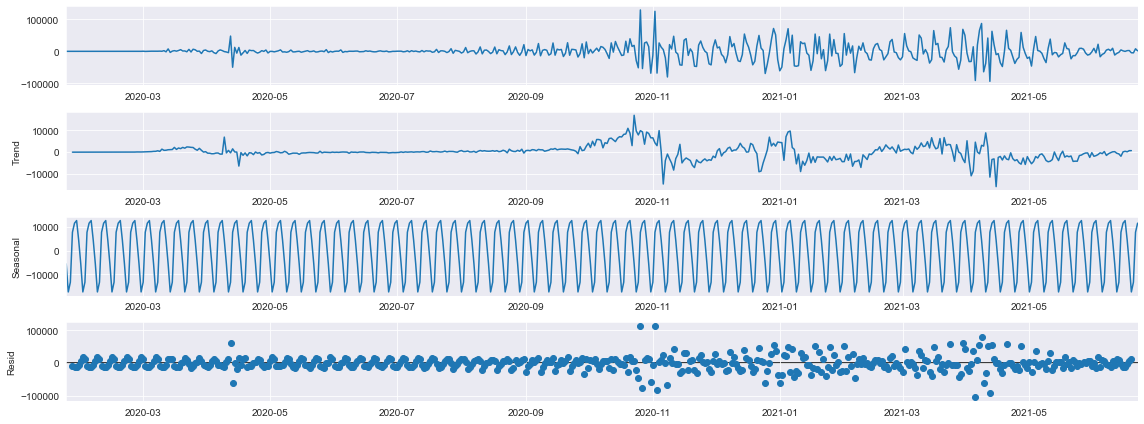

In [63]:
decomp_cases = seasonal_decompose(cases_diff,model="additive")  #Additive due to negative/zeros values
fig = decomp_cases.plot()

**Interprétation**:
  - La trend et les résiduels sont assez explicites et expliquent bien les variations observées dans les données.
  - La saisonalité (7 jours) a été détectée automatiquement  

In [64]:
decomp_cases.seasonal.head(16)

Date
2020-01-24    -5573.332825
2020-01-25   -17334.595056
2020-01-26   -13240.245713
2020-01-27     7690.064436
2020-01-28    11498.712185
2020-01-29    12591.763066
2020-01-30     4367.633907
2020-01-31    -5573.332825
2020-02-01   -17334.595056
2020-02-02   -13240.245713
2020-02-03     7690.064436
2020-02-04    11498.712185
2020-02-05    12591.763066
2020-02-06     4367.633907
2020-02-07    -5573.332825
2020-02-08   -17334.595056
Freq: D, Name: seasonal, dtype: float64

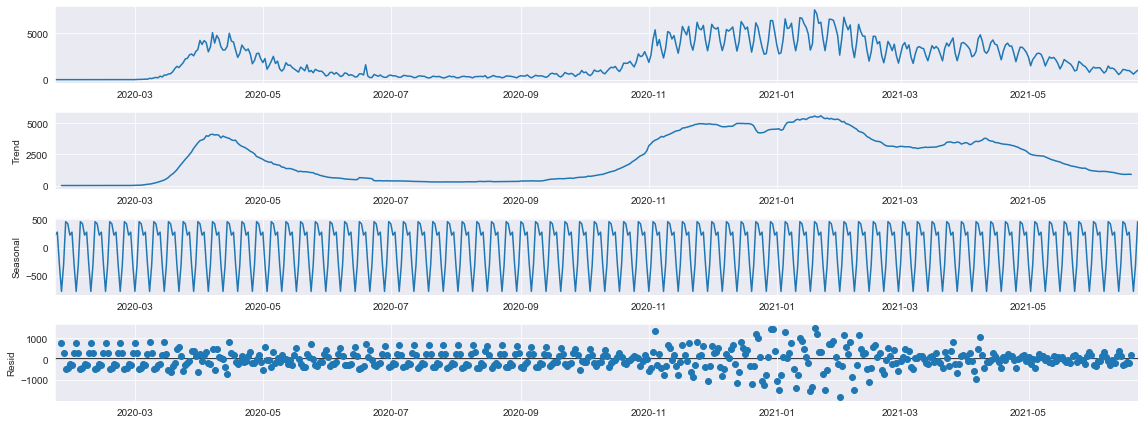

In [65]:
decomp_deaths = seasonal_decompose(df_deaths,model="additive") 
fig = decomp_deaths.plot()

In [66]:
decomp_deaths.seasonal.head(16)

Date
2020-01-23    221.386916
2020-01-24    275.173609
2020-01-25   -297.458485
2020-01-26   -776.478054
2020-01-27   -307.029913
2020-01-28    460.471065
2020-01-29    423.934862
2020-01-30    221.386916
2020-01-31    275.173609
2020-02-01   -297.458485
2020-02-02   -776.478054
2020-02-03   -307.029913
2020-02-04    460.471065
2020-02-05    423.934862
2020-02-06    221.386916
2020-02-07    275.173609
Freq: D, Name: seasonal, dtype: float64

**Interprétation**:
  - La trend est beaucoup plus lisse ce qui est tout à fait normal au vue des données observées.
  - La saisonalité (7 jours) a été détectée automatiquement 
  - Les résiduels sont beaucoup plus importants

 - ### 6.2 <span style="color:blue"> ACF: Autocorrelation plots</span>

**Informations pouvant être extraite des plots ACF-PACF**.

- **Modèle AR** : 
    1.  **ACF** --> Au fur et à mesure, après un certain point, il n'y a plus de relation.
    2. **PACF** --> Après un certain nombre de lag, tout à coup la relation temporelle n'existe plus.
- **Modèle MA** : 
    1. **ACF** --> Après un certain nombre de lag, tout à coup la relation temporelle n'existe plus.
    2. **PACF** --> Au fur et à mesure, après un certain point, il n'y a plus de relation.

- **Analyse visuelle des autocorrelations et leurs significativité**

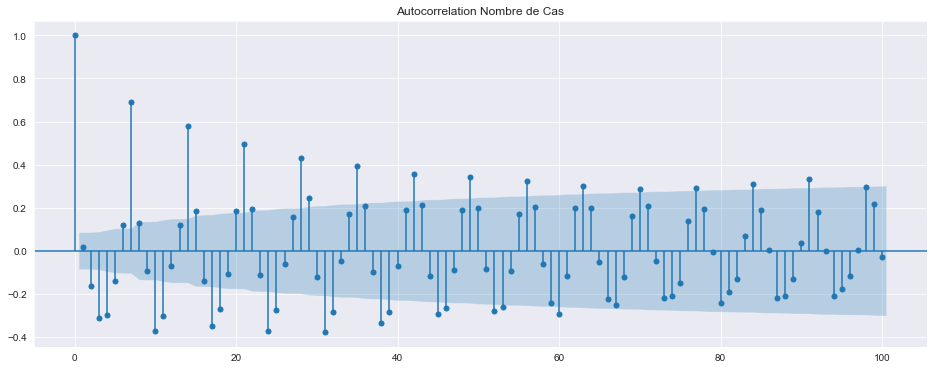

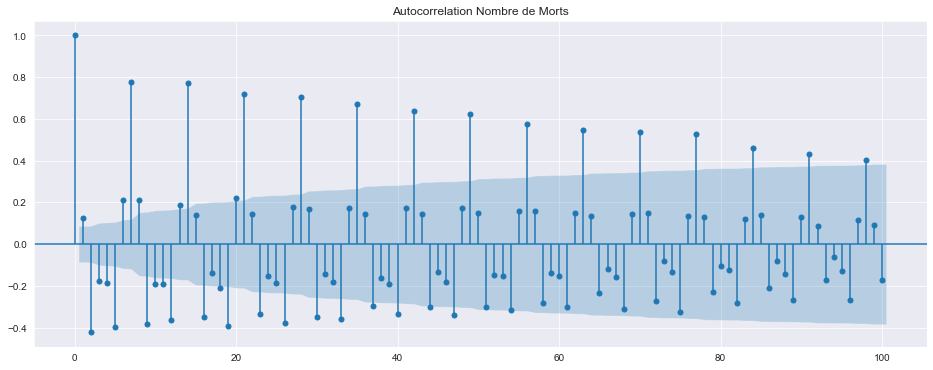

In [67]:
plot_acf(cases_diff, lags = 100, title='Autocorrelation Nombre de Cas')
plt.show()

plot_acf(deaths_diff, lags = 100, title='Autocorrelation Nombre de Morts')
plt.show()

**Le plot ACF est une representation des coéfficients de corrélation entre une Time series et ses valeurs antérieures.**

Dans les deux séries:
 - **Les lags démontrent une tendance sinusoidale décroissante qui alterne entre corrélations positive et négative ce qui prévoit un processus AR+MA**. 
 - **Les lags positifs récurrents chaque 7 jours correspondent à la période de saisonnalité**.
 - **Terme autorégressif d'ordre supérieur dans les données**.

 - ### 6.3 <span style="color:blue"> PACF: Partial autocorrelation plots</span>

- **Analyse visuelle de la relation directe entre Y(t) et Y(t-1)**

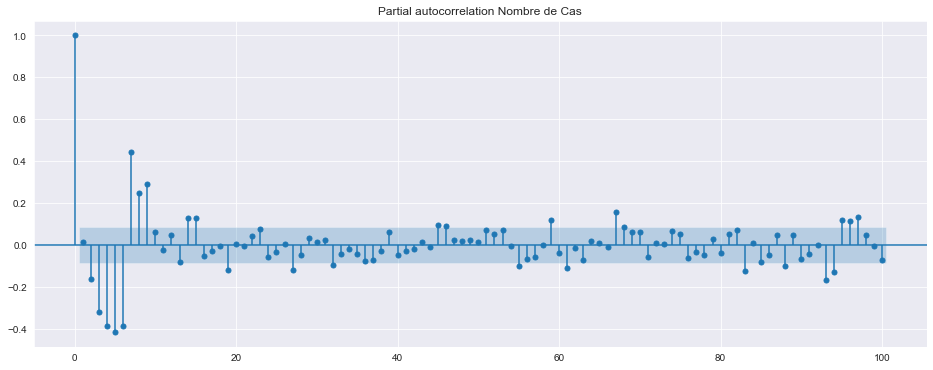

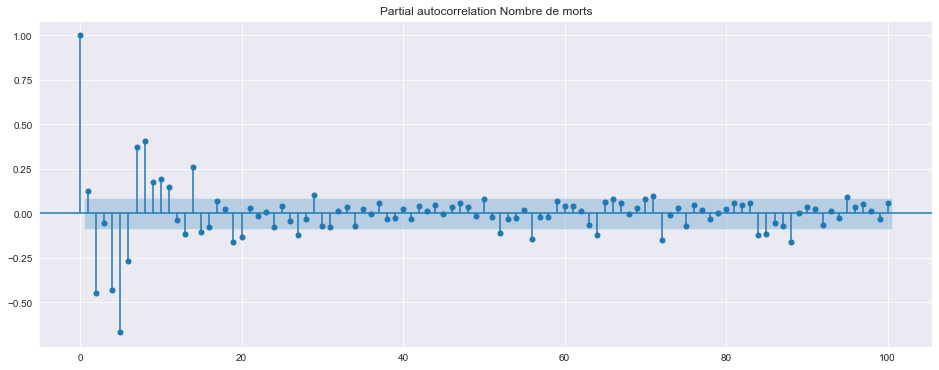

In [68]:
plot_pacf(cases_diff, lags = 100,title='Partial autocorrelation Nombre de Cas')
plt.show()

plot_pacf(deaths_diff, lags = 100, title="Partial autocorrelation Nombre de morts")
plt.show()

**Le plot PACF représente la fonction d'autocorrélation partielle qui explique la corrélation partielle entre la série temporelle et ses propres lags avec une régression linéaire qui prédit y(t) à partir des valeurs antérieures y(t-1), y(t-2), y(t-3)...**

 - Pour les deux séries, on observe une baisse significative de l'importance des lags au bout de 9 jours pour les cas et 8 jours pour les morts


 - ### 6.4 <span style="color:blue"> Train & Test splits</span>

In [69]:

train_cases, test_cases= np.split(cases_diff, [int(.80 *len(cases_diff))])
train_deaths, test_deaths= np.split(deaths_diff, [int(.80 *len(deaths_diff))])

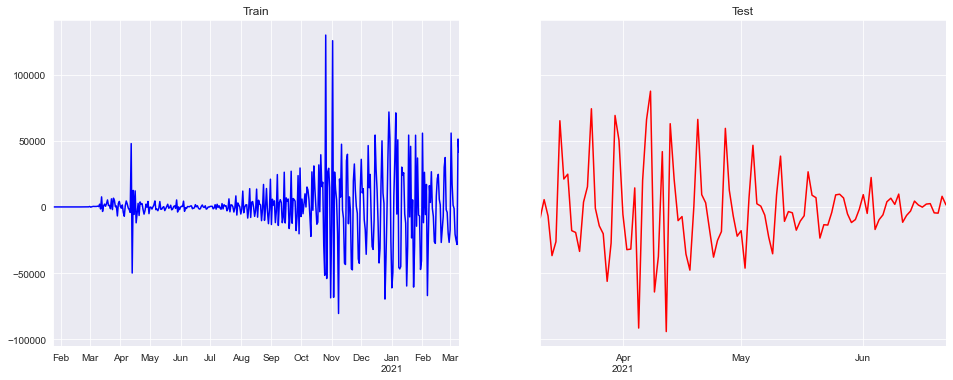

In [70]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=True)

train_cases.plot(ax=ax[0], grid=True, title="Train", color="blue",legend=None)
test_cases.plot(ax=ax[1], grid=True, title="Test", color="red", legend=None)

ax[0].set(xlabel=None)
ax[1].set(xlabel=None)
 
plt.show()

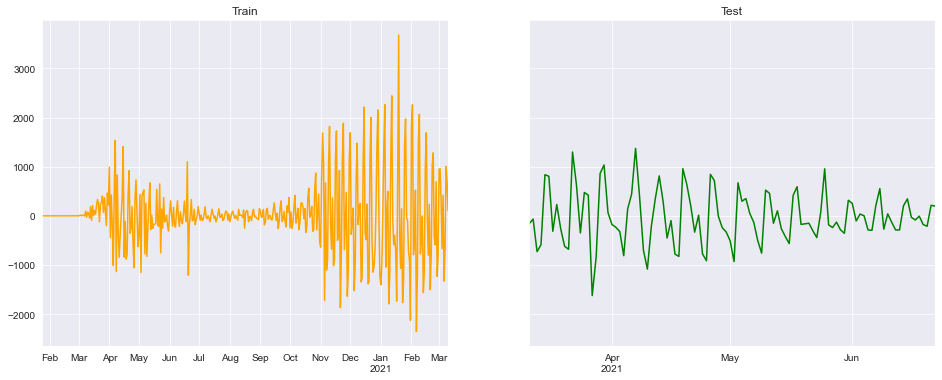

In [71]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=True)

train_deaths.plot(ax=ax[0], grid=True, title="Train", color="orange",legend=None)
test_deaths.plot(ax=ax[1], grid=True, title="Test", color="green", legend=None)

ax[0].set(xlabel=None)
ax[1].set(xlabel=None)
 
plt.show()

# 7.<span style="color:red"> Modélisation </span>

 - ### 7.1 <span style="color:blue"> Random Walk</span>

In [72]:
'''
Generate a Random Walk process.
: using the parameters of the Standard and Poor Weekly Data observations (we will use Adj Close)
    :param y0: num - observation #1 
    :param n: num - total number of observations
    :param ymin: num - limit
    :param ymax: num - limit
'''
def generate_rw(y0, n, sigma, ymin=None, ymax=None):
    random.seed(15)
    rw = [y0]
    for t in range(1, n):
        yt = rw[t-1] + np.random.normal(0,sigma)
        if (ymax is not None) and (yt > ymax):
            yt = rw[t-1] - abs(np.random.normal(0,sigma))
        elif (ymin is not None) and (yt < ymin):
            yt = rw[t-1] + abs(np.random.normal(0,sigma))
        rw.append(yt)
    return rw

In [73]:
def simulate_rw(train, test):
    ## simulate train
    #diff_ts = train - train.shift(1)
    rw = generate_rw(y0=train[0], n=len(train), sigma=train.std(), ymin=train.min(), ymax=train.max())
    dtf_train = train.to_frame(name="data").merge(pd.DataFrame(rw, index=train.index, columns=["model"]), how='left', left_index=True, right_index=True)
    
    ## test
    rw = generate_rw(y0=test[0], n=len(test), 
                           sigma=train.std(), ymin=train.min(), 
                           ymax=train.max())
    dtf_test = test.to_frame(name="data").merge(
                 pd.DataFrame(rw, index=test.index, 
                              columns=["forecast"]), how='left', 
                              left_index=True, right_index=True)
    ## evaluate
    dtf = dtf_train.append(dtf_test)
    #dtf = utils_evaluate_forecast(dtf, figsize=figsize, 
                                  #title="Random Walk Simulation")
    return dtf

In [74]:
result_cases = simulate_rw(train_cases, test_cases)
result_cases

data         model      forecast
Date                                          
2020-01-24     2.0      2.000000           NaN
2020-01-25    -1.0  -7988.386910           NaN
2020-01-26    -1.0 -12146.394829           NaN
2020-01-27     1.0  16877.270763           NaN
2020-01-28     3.0  13668.662442           NaN
...            ...           ...           ...
2021-06-18  2506.0           NaN  65169.292905
2021-06-19 -4451.0           NaN  63623.967451
2021-06-20 -4688.0           NaN  53496.332172
2021-06-21  8034.0           NaN  70502.853738
2021-06-22  1537.0           NaN  67448.147008

[516 rows x 3 columns]

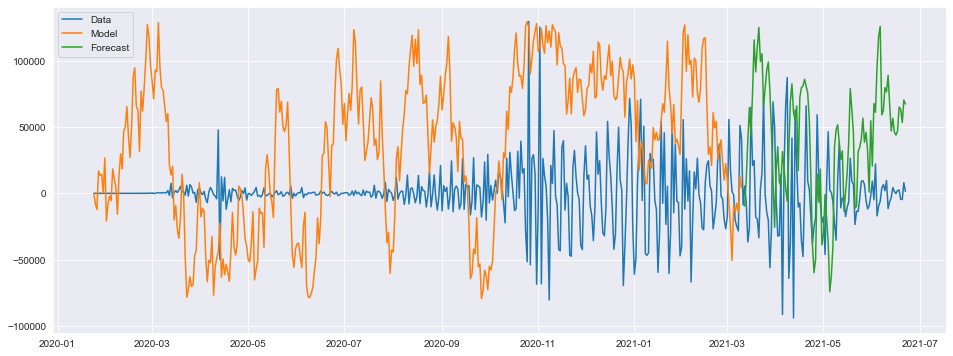

In [75]:
plt.plot(result_cases)
plt.legend(('Data', 'Model', 'Forecast'))
plt.show()

In [76]:
result_deaths = simulate_rw(train_deaths, test_deaths)
result_deaths

data        model    forecast
Date                                      
2020-01-24    0.0     0.000000         NaN
2020-01-25    0.0  -340.526646         NaN
2020-01-26    0.0  -167.519687         NaN
2020-01-27    0.0   332.840942         NaN
2020-01-28    0.0  1278.344609         NaN
...           ...          ...         ...
2021-06-18   -6.0          NaN  334.248192
2021-06-19 -177.0          NaN   17.900666
2021-06-20 -211.0          NaN  126.958895
2021-06-21  214.0          NaN  629.367424
2021-06-22  200.0          NaN -356.704964

[516 rows x 3 columns]

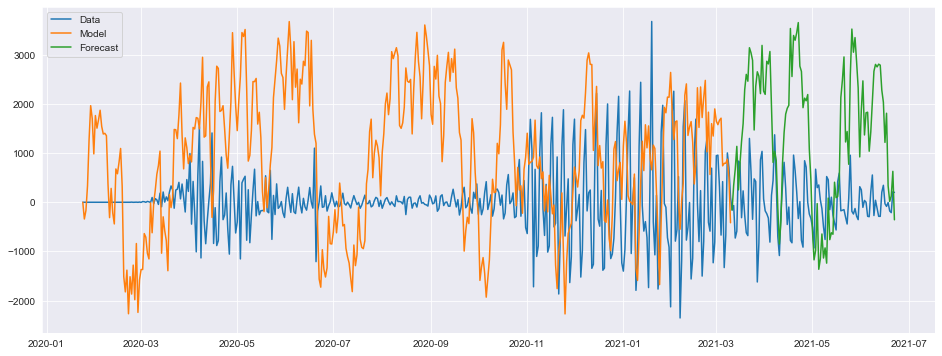

In [77]:
plt.plot(result_deaths)
plt.legend(('Data', 'Model', 'Forecast'))
plt.show()

 - #### 7.1.a <span style="color:green"> RMSE : Random Walk</span>

In [78]:
## residuals
result_cases["residuals"] = result_cases["data"] - result_cases["model"]
result_cases["error"] = result_cases["data"] - result_cases["forecast"]
result_cases["error_pct"] = result_cases["error"] / result_cases["data"]
        
## kpi
residuals_mean = result_cases["residuals"].mean()
residuals_std = result_cases["residuals"].std()
error_mean = result_cases["error"].mean()
error_std = result_cases["error"].std()
mae = result_cases["error"].apply(lambda x: np.abs(x)).mean()
mape = result_cases["error_pct"].apply(lambda x: np.abs(x)).mean()  
mse_rw = result_cases["error"].apply(lambda x: x**2).mean()
rmse_rw_cases = np.sqrt(mse_rw)  #root mean squared error

In [79]:
## residuals
result_deaths["residuals"] = result_deaths["data"] - result_deaths["model"]
result_deaths["error"] = result_deaths["data"] - result_deaths["forecast"]
result_deaths["error_pct"] = result_deaths["error"] / result_deaths["data"]
        
## kpi
residuals_mean = result_deaths["residuals"].mean()
residuals_std = result_deaths["residuals"].std()
error_mean = result_deaths["error"].mean()
error_std = result_deaths["error"].std()
mae = result_deaths["error"].apply(lambda x: np.abs(x)).mean()
mape = result_deaths["error_pct"].apply(lambda x: np.abs(x)).mean()  
mse_rw_deaths = result_deaths["error"].apply(lambda x: x**2).mean()
rmse_rw_deaths = np.sqrt(mse_rw_deaths)  #root mean squared error

In [80]:
rmse_rw_cases

68134.9272540148

In [81]:
rmse_rw_deaths

2070.870947365397

**Les RMSE du random walk sont très importantes**

 - ### 7.2 <span style="color:blue"> AutoReg model sans Saisonalité</span>

In [82]:
cases_diff = pd.DataFrame(cases_diff, index = cases_diff.index, columns = ["Total"])

In [83]:
deaths_diff = pd.DataFrame(deaths_diff, index = cases_diff.index, columns = ["Total"])

 - #### 7.2.a <span style="color:green"> Lag plots</span>

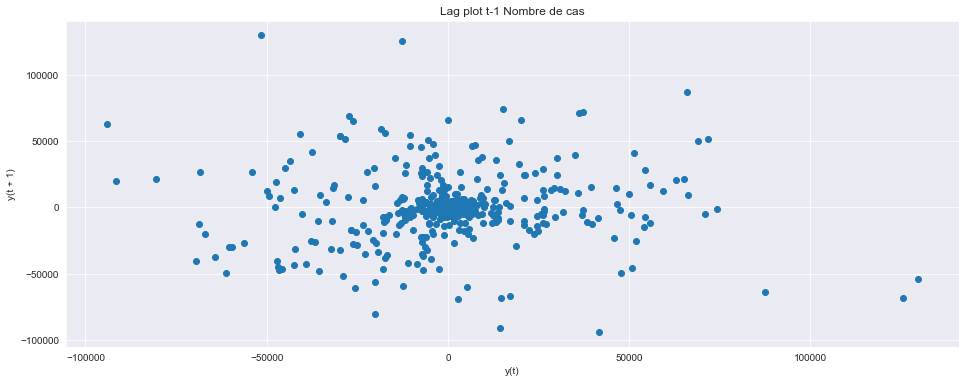

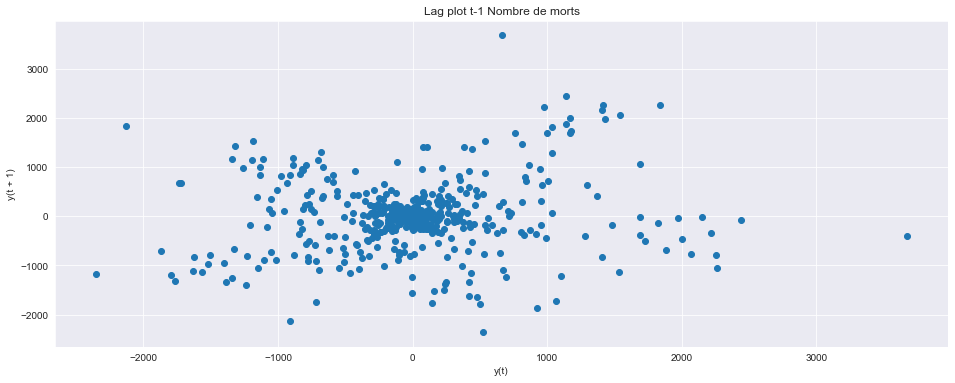

In [84]:
lag_plot(cases_diff["Total"])
plt.title("Lag plot t-1 Nombre de cas")
plt.show();

lag_plot(deaths_diff["Total"])
plt.title("Lag plot t-1 Nombre de morts")
plt.show()

**Concentration des points autour de zéro**

**Les outliers sont nombreux**

 - #### 7.2.b <span style="color:green"> Choix des lags</span>

In [85]:
mod = ar_select_order(cases_diff, maxlag=30,old_names = False)
mod.ar_lags

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [86]:
mod = ar_select_order(deaths_diff, maxlag=50,old_names = False)
mod.ar_lags

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

 - #### 7.2.c <span style="color:green"> Entraînement de la série: nombre de Cas</span>

In [87]:
mod_cases = AutoReg(cases_diff, lags =[2, 3, 4, 5, 6, 7, 8, 9],old_names = False)
res_cases = mod_cases.fit()
print(res_cases.summary())

                            AutoReg Model Results                             
Dep. Variable:                  Total   No. Observations:                  516
Model:              Restr. AutoReg(9)   Log Likelihood               -5651.550
Method:               Conditional MLE   S.D. of innovations          16782.673
Date:                Tue, 05 Oct 2021   AIC                             19.496
Time:                        19:32:19   BIC                             19.579
Sample:                    02-02-2020   HQIC                            19.528
                         - 06-22-2021                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         47.2713    745.598      0.063      0.949   -1414.074    1508.617
Total.L2      -0.2001      0.046     -4.326      0.000      -0.291      -0.109
Total.L3      -0.1125      0.044     -2.567      0.0

 - #### 7.2.d <span style="color:green"> Interprétation</span>


- **La méthode d'estimation : conditional maximum likelihood** 
- **L'AIC (akaike information criteria)détermine la qualité du modèle autoregressif appliqué en prenant compte du maximum likelihood et des nombres de paramètres**.

  AIC = ${2k-2\ln({\hat {L}})}$

**Plus l'AIC est petit plus le modèle est performant**.

- **Les lags n° 1 & 7 sont les plus impactants avec une faible p-value et un coefficient relativement conséquent**
- **La P|z| doit être inférieure à 5% pourque les coefficients soient significatifs ce qui est le cas de nos lags à part le L6**.
- **Les 6 premiers lags ont un impact négatif sur les valeurs et les 3 derniers ont un impact positif sur les valeurs**.

 - #### 7.2.e <span style="color:green"> Entraînement sur la série: nombre de Morts</span>

In [88]:
mod_deaths = AutoReg(deaths_diff["Total"], lags =[ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],old_names = False)
res_deaths = mod_deaths.fit()
print(res_deaths.summary())

                            AutoReg Model Results                             
Dep. Variable:                  Total   No. Observations:                  516
Model:                    AutoReg(14)   Log Likelihood               -3621.963
Method:               Conditional MLE   S.D. of innovations            329.023
Date:                Tue, 05 Oct 2021   AIC                             11.656
Time:                        19:32:19   BIC                             11.790
Sample:                    02-07-2020   HQIC                            11.709
                         - 06-22-2021                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0353     14.693      0.070      0.944     -27.761      29.832
Total.L1      -0.4278      0.043     -9.927      0.000      -0.512      -0.343
Total.L2      -0.5157      0.047    -10.946      0.0

 - #### 7.2.f <span style="color:green"> Interprétation</span>


- **Les lags n° 2 & 8 sont les plus impactants avec une faible p-value et un coefficient relativement conséquent**
- **La P|z| doit être inférieure à 5% pourque les coefficients soient significatifs ce qui est le cas de nos lags à part le L6**.
- **Les 5 premiers lags ont un impact négatif sur les valeurs et les restes ont un impact positif sur les valeurs**.

 - #### 7.2.g <span style="color:green"> Prédictions</span>

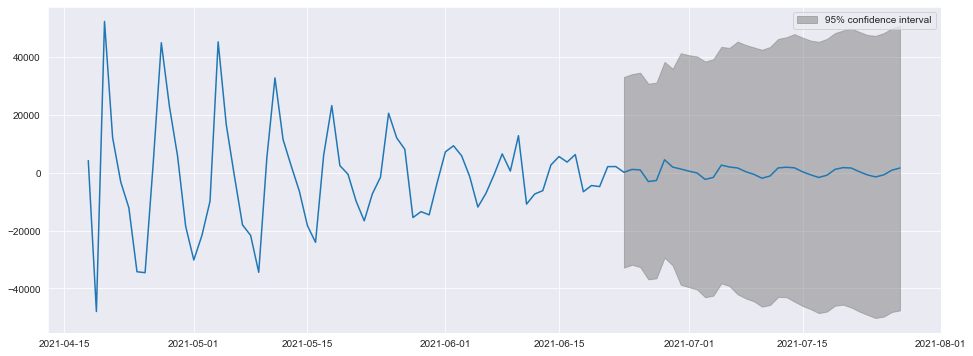

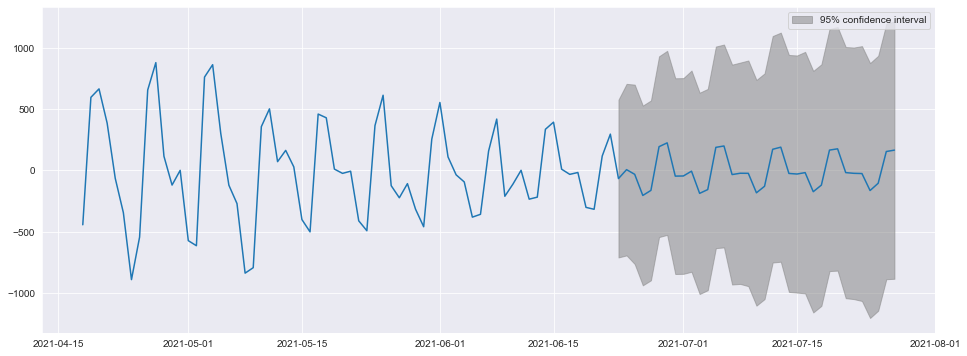

In [89]:
#1 = Start, 550 = End (517 observations sont déjà dans notre Timeseries)
fig = res_cases.plot_predict(450,550)
fig = res_deaths.plot_predict(450,550)

**Les prédictions des nombres de Cas tendent à une linéarisation vers 0 avec des amplitudes très faibles**

**Les prédictions des nombres de morts montrent une très légère tendance à la baisse des amplitudes en gardant une moyenne constante dans le temps**

 - #### 7.2.h <span style="color:green"> Models diagnostics</span>

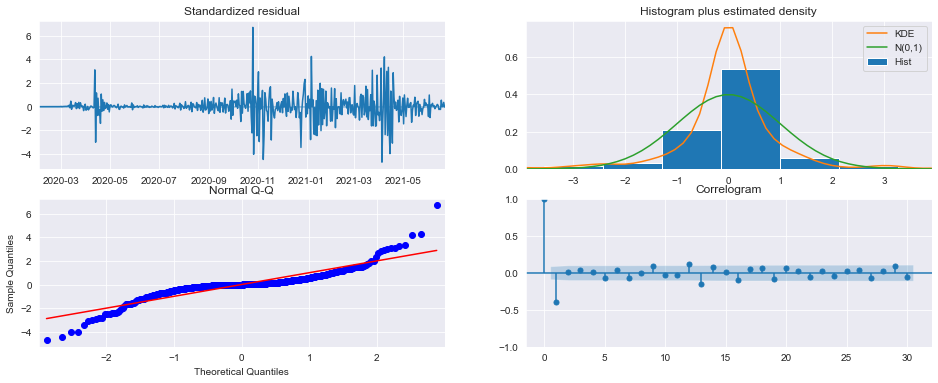

In [90]:
fig = res_cases.plot_diagnostics(lags=30)

**interprétation des résultats**

 - A. Standardized residuals

Le standardized residual est une mesure de la force de la différence entre les valeurs observées et attendues. C'est une mesure de l'importance des cellules par rapport à la valeur du chi-square. 
Pour la série des nombres de cas, les cellules qui contribuent le plus aux vraies valeurs et qui sont supérieurs à 3 correspondent aux vagues de contaminations observées en **Avril 2020** , **Octobre 2020** , **Janvier 2021**  et **Avril 2021**.
Notons aussi la présence des outliers surtout en **Octobre 2020** qui correspont au plus fort de la pandémie.


 - B. Histogram
L'histogramme KDE détermine la meilleure distribution possible de la donnée.

 - C. QQ Plot
Le Q-Q plot, or quantile-quantile plot, est une représentation graphique des quantiles, pour la série nombres de cas, on observe des queues droite & gauche assez épaisse avec des outliers  (-5 , 6)

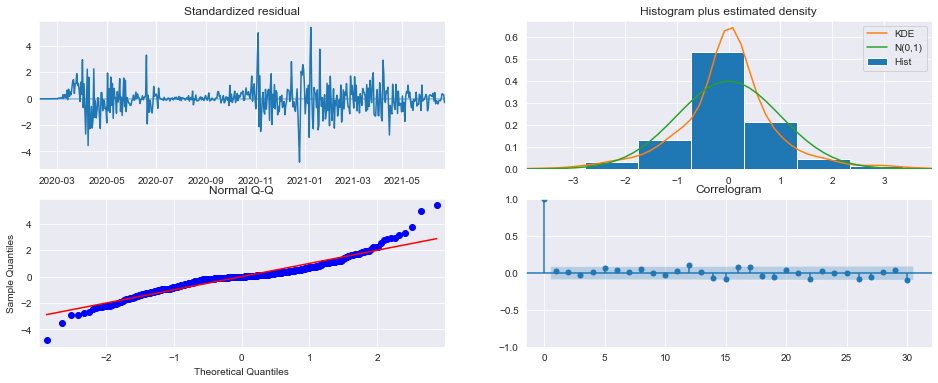

In [91]:
fig = res_deaths.plot_diagnostics(lags=30)

**interprétation des résultats**

 - A. Standardized residuals

Pour la série des nombres de morts, les cellules qui contribuent le plus aux vraies valeurs et qui sont supérieurs à 3 correspondent aux morts suite aux vagues de contaminations  observées en **Avril 2020**, **Juin 2020** , **Novembre 2020** , **Janvier 2021**  et **Avril 2021**.
Notons aussi la présence des outliers surtout en **Novembre 2020** qui vient juste après le pic de pandémie en **Octobre2020**.


 - B. Histogram
L'histogramme KDE détermine la meilleure distribution possible de la donnée.

 - C. QQ Plot
Le Q-Q plot, or quantile-quantile plot, est une représentation graphique des quantiles, pour la série nombres de morts, on observe une queue droite épaisse et avec des outliers  (-5 , 6)

 - ### 7.2 (bis) <span style="color:blue"> AutoReg model avec Saisonalité</span>

 - #### 7.2.a <span style="color:green"> Choix des lags et Entraînement de la série: nombre de Cas</span>

In [92]:
sel_C = ar_select_order(cases_diff,30, seasonal=True)
sel_C.ar_lags
res_C = sel_C.model.fit()
print(res_C.summary())

                            AutoReg Model Results                             
Dep. Variable:                  Total   No. Observations:                  516
Model:               Seas. AutoReg(9)   Log Likelihood               -5594.569
Method:               Conditional MLE   S.D. of innovations          14998.620
Date:                Tue, 05 Oct 2021   AIC                             19.298
Time:                        19:32:22   BIC                             19.440
Sample:                    02-02-2020   HQIC                            19.354
                         - 06-22-2021                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1378.6517   1958.025      0.704      0.481   -2459.006    5216.310
seasonal.1 -3987.0992   2621.893     -1.521      0.128   -9125.916    1151.717
seasonal.2 -5544.8822   2820.639     -1.966      0.0

 - #### 7.2.b <span style="color:green"> Interprétation</span>


- **La saisonalité.2 est la plus impactante avec une p_value<5% et un coefficient négatif assez important**
- **l'AIC ne s'est pas vraiment amélioré par rapport à un AutoReg model sans contrôle de saisonnalité**.

 - #### 7.2.c <span style="color:green"> Choix des lags et Entraînement de la série: nombre de morts</span>

In [93]:
sel_D = ar_select_order(deaths_diff, 30, seasonal=True)
sel_D.ar_lags
res_D = sel_D.model.fit()
print(res_D.summary())

                            AutoReg Model Results                             
Dep. Variable:                  Total   No. Observations:                  516
Model:              Seas. AutoReg(14)   Log Likelihood               -3614.397
Method:               Conditional MLE   S.D. of innovations            324.101
Date:                Tue, 05 Oct 2021   AIC                             11.650
Time:                        19:32:22   BIC                             11.835
Sample:                    02-07-2020   HQIC                            11.722
                         - 06-22-2021                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     82.7604     48.373      1.711      0.087     -12.049     177.570
seasonal.1  -161.2103     66.127     -2.438      0.015    -290.817     -31.604
seasonal.2  -179.2817     74.606     -2.403      0.0

 - #### 7.2.d <span style="color:green"> Interprétation</span>


- **Les deux premières saisonalités sont les plus impactantes avec une p_value<5% et un coefficient négatif assez important**
- **l'AIC ne s'est pas vraiment amélioré par rapport à un AutoReg model sans contrôle de saisonnalité**.

 - #### 7.2.e <span style="color:green"> Prédictions</span>

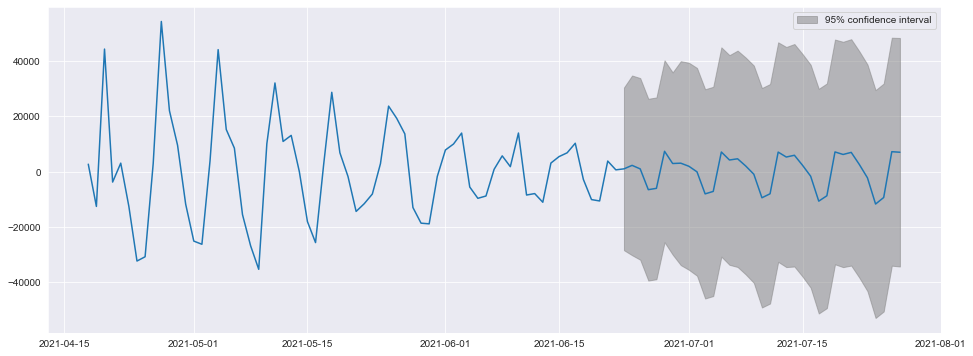

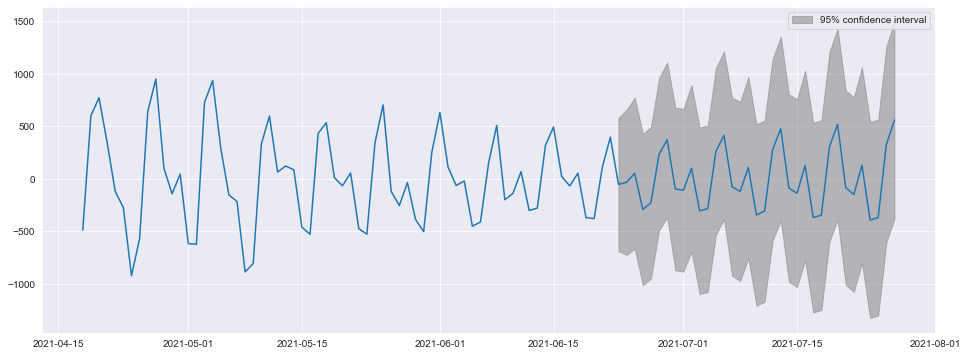

In [94]:
#1 = Start, 550 = End (517 observations sont déjà dans notre Timeseries)
fig = res_C.plot_predict(450,550)
fig = res_D.plot_predict(450,550)

**Les prédictions des nombres de Cas gardent une amplitude légèrement croissante ce qui prévoit une croissance des nombres de cas**

**Les prédictions des nombres de morts montrent une tendance à la hausse des amplitudes ce qui prévoit une augmentation des nombres de morts dans le temps**

 - #### 7.2.f <span style="color:green"> Models diagnostics</span>

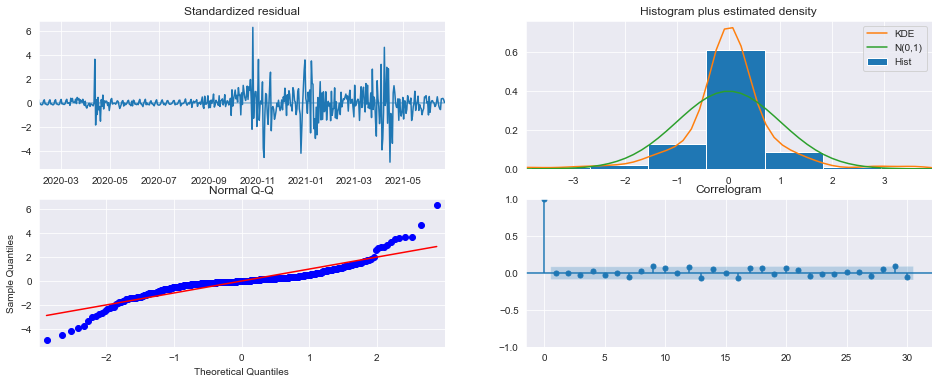

In [95]:
fig = res_C.plot_diagnostics(lags=30)

**Les diagnostics sont sensiblement similaires à l'AutoReg sans saisonnalité**

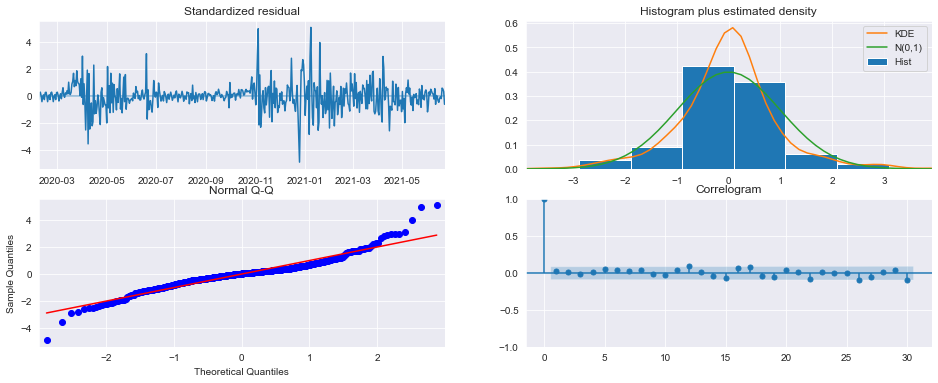

In [96]:
fig = res_D.plot_diagnostics(lags=30)

**La distribution des Quantiles des nombres de morts est plus aplatie à gauche et moins épaisse à droite**

 - ### 7.3 <span style="color:blue"> ARMA model</span>

 - #### 7.3.a <span style="color:green"> AutoArima & Interprétation sur la série: Nombre de Cas</span>

In [97]:
cases_model = auto_arima(cases_diff)
cases_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  516
Model:               SARIMAX(5, 0, 4)   Log Likelihood               -5737.239
Date:                Tue, 05 Oct 2021   AIC                          11494.477
Time:                        19:32:51   BIC                          11536.938
Sample:                             0   HQIC                         11511.116
                                - 516                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3614      0.085      4.247      0.000       0.195       0.528
ar.L2         -0.9651      0.073    -13.234      0.000      -1.108      -0.822
ar.L3         -0.0081      0.092     -0.088      0.930      -0.188       0.172
ar.L4         -0.4765      0.043    -11.136      0.000      -0.560      -0.393
ar.L5         -0.4542      0.049     -9.182      0.000      -0.551      -0.357
ma.L1         -0.8668      0.094     -9.238      0.000      -1.051      -0.683
ma.L2          1.0968      0.108     10.186      0.000       0.886       1.308
ma.L3         -0.5117      0.100     -5.097      0.000      -0.708      -0.315
ma.L4          0.4675      0.058      8.033      0.000       0.353       0.582
sigma2      3.388e+08   3.33e-10   1.02e+18      0.000    3.39e+08    3.39e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.21   Jarque-Bera (JB):              1811.32
Prob(Q):                              0.65   Prob(JB):                         0.00
Heteroskedasticity (H):              14.60   Skew:                             0.88
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.57e+34. Standard errors may be unstable.
"""

**Le modèle préconisé par AutoArima est SARIMAX (5,0,4) avec un AutoReg d'ordre 5, pas d'intégration puisque la série est stationnaire et une Moving Average d'ordre 4 avec une composante saisonnalité**

 - #### 7.3.b <span style="color:green"> AutoArima & Interprétaion sur la série: Nombre de Morts</span>

In [98]:
deaths_model = auto_arima(deaths_diff)
deaths_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  516
Model:               SARIMAX(2, 0, 2)   Log Likelihood               -3921.638
Date:                Tue, 05 Oct 2021   AIC                           7853.276
Time:                        19:33:02   BIC                           7874.507
Sample:                             0   HQIC                          7861.596
                                - 516                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1640      0.018     64.494      0.000       1.129       1.199
ar.L2         -0.8529      0.017    -51.237      0.000      -0.885      -0.820
ma.L1         -1.5594      0.021    -73.569      0.000      -1.601      -1.518
ma.L2          0.8312      0.021     39.049      0.000       0.789       0.873
sigma2      2.323e+05   9786.602     23.737      0.000    2.13e+05    2.51e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               162.48
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               2.62   Skew:                             0.42
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**Le modèle préconisé par AutoArima est SARIMAX (2,0,2) avec un AutoReg d'ordre 2, pas d'intégration puisque la série est stationnaire et une Moving Average d'ordre 2 avec une composante saisonnalité**

 - #### 7.3.c <span style="color:green"> SARIMAX sur la série: Nombre de Cas</span>

In [99]:
cases_model = sm.tsa.statespace.SARIMAX(train_cases,order=(5,0,4), seasonal_order=(1,0,1,7))

In [100]:
results_cases = cases_model.fit()
results_cases.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  412
Model:             SARIMAX(5, 0, 4)x(1, 0, [1], 7)   Log Likelihood               -4531.146
Date:                             Tue, 05 Oct 2021   AIC                           9086.291
Time:                                     19:33:05   BIC                           9134.543
Sample:                                 01-24-2020   HQIC                          9105.377
                                      - 03-10-2021                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1163      0.340     -0.342      0.732      -0.783       0.550
ar.L2         -0.1572      0.336     -0.467      0.640      -0.816       0.502
ar.L3         -0.5465      0.288     -1.895      0.058      -1.112       0.019
ar.L4         -0.5081      0.236     -2.155      0.031      -0.970      -0.046
ar.L5         -0.2852      0.097     -2.932      0.003      -0.476      -0.095
ma.L1         -0.2937      0.346     -0.848      0.396      -0.972       0.385
ma.L2          0.0596      0.456      0.131      0.896      -0.833       0.952
ma.L3          0.4992      0.426      1.173      0.241      -0.335       1.333
ma.L4          0.3314      0.285      1.161      0.246      -0.228       0.891
ar.S.L7        0.6015      0.076      7.922      0.000       0.453       0.750
ma.S.L7       -0.0060      0.111     -0.054      0.957      -0.223       0.211
sigma2       3.11e+08   3.65e-09   8.52e+16      0.000    3.11e+08    3.11e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):              2400.02
Prob(Q):                              0.70   Prob(JB):                         0.00
Heteroskedasticity (H):              12.62   Skew:                             0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.51e+32. Standard errors may be unstable.
"""

- **Les lags 4 & 5 sont les plus significatifs statistiquement avec des p_value<5% et des coefficients négatifs**
- **La saisonnalité 7jours impacte positivement les valeurs**
- **L'AIC même si il est amélioré par rapport à l'estimation de l'autoarima reste très elevé**

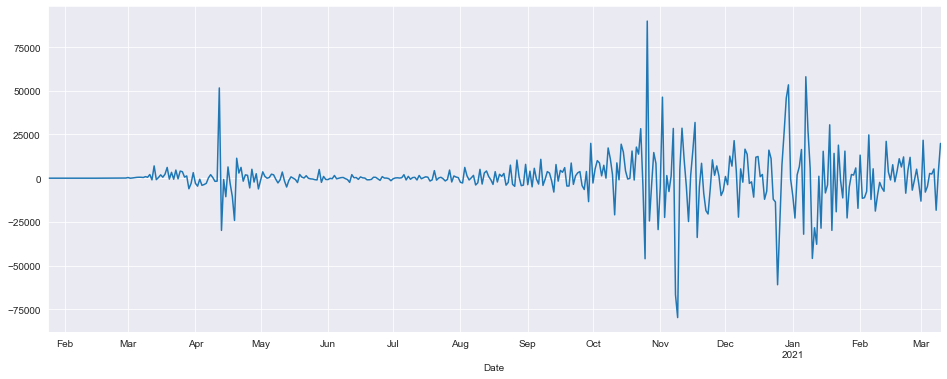

In [101]:
results_cases.resid.plot();

- **Les résiduels démontrent les pics épidémiques les plus importants et leurs impacts sur les valeurs de la série temporelle**

 - #### 7.3.d <span style="color:green"> SARIMAX sur la série: Nombre de Morts</span>

In [102]:
deaths_model = sm.tsa.statespace.SARIMAX(train_deaths,order=(2,0,2), seasonal_order=(1,0,1,7))

In [103]:
results_deaths = deaths_model.fit()
results_deaths.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  412
Model:             SARIMAX(2, 0, 2)x(1, 0, [1], 7)   Log Likelihood               -3044.230
Date:                             Tue, 05 Oct 2021   AIC                           6102.460
Time:                                     19:33:08   BIC                           6130.607
Sample:                                 01-24-2020   HQIC                          6113.593
                                      - 03-10-2021                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1157      0.037     -3.095      0.002      -0.189      -0.042
ar.L2          0.8744      0.035     24.989      0.000       0.806       0.943
ma.L1         -0.0017      0.069     -0.025      0.980      -0.136       0.133
ma.L2         -0.9982      0.050    -20.084      0.000      -1.096      -0.901
ar.S.L7        0.9581      0.013     71.065      0.000       0.932       0.984
ma.S.L7       -0.5074      0.036    -14.138      0.000      -0.578      -0.437
sigma2      1.495e+05   6.09e-07   2.45e+11      0.000    1.49e+05    1.49e+05
===================================================================================
Ljung-Box (L1) (Q):                  16.10   Jarque-Bera (JB):               247.85
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.87   Skew:                             0.37
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number  4e+27. Standard errors may be unstable.
"""

- **Le lag n°2 est le plus significatif avec un coefficient positif relativement important**
- **La saisonnalité 7jours impacte positivement les valeurs**
- **La Moving Average du Lag2 impacte négativement les valeurs avec un coefficient négatif important**
- **L'AIC même si il est amélioré par rapport à l'estimation de l'autoarima reste très elevé**

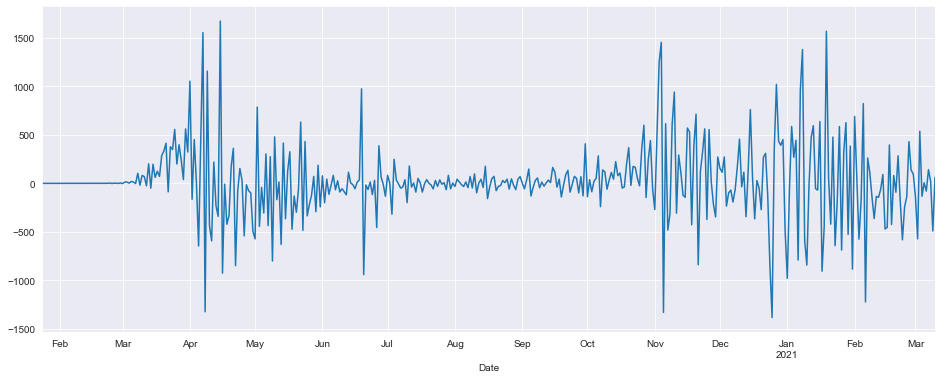

In [104]:
results_deaths.resid.plot();

- **Les résiduels démontrent les pics de mortalités qui suivent les pics épidémiques les plus importants et leurs impacts sur les valeurs de la série temporelle**

 - #### 7.3.e <span style="color:green"> Prédictions ARMA</span>

In [105]:
def forecast_to_df(model, steps=7):
    forecast = model.get_forecast(steps=steps)
    pred_df = forecast.conf_int()
    pred_df['pred'] = forecast.predicted_mean
    pred_df.columns = ['lower', 'upper', 'pred']
    return pred_df

In [106]:
len(test_cases)

104

In [107]:
pred_df = forecast_to_df(results_cases, steps = len(test_cases))

In [108]:
series_cases = test_cases - pred_df["pred"]
mse_arma_cases = series_cases.apply(lambda x: x**2).mean()
rmse_arma_cases = np.sqrt(mse_arma_cases)  #root mean squared error

In [109]:
pred = pred_df['pred']

In [110]:
def plot_train_test_pred(train,test,pred_df):
    fig,ax = plt.subplots(figsize=(12,7))
    kws = dict(marker='o')
    
    ax.plot(train,label='Train',**kws)
    ax.plot(test,label='Test',**kws)
    ax.plot(pred_df['pred'],label='Prediction',ls='--',linewidth=3)

    ax.fill_between(x=pred_df.index,y1=pred_df['lower'],y2=pred_df['upper'],alpha=0.3)
    ax.set_title('Model Validation', fontsize=22)
    ax.legend(loc='upper left')
    fig.tight_layout()
    return fig,ax

(<Figure size 864x504 with 1 Axes>,
 <AxesSubplot:title={'center':'Model Validation'}>)

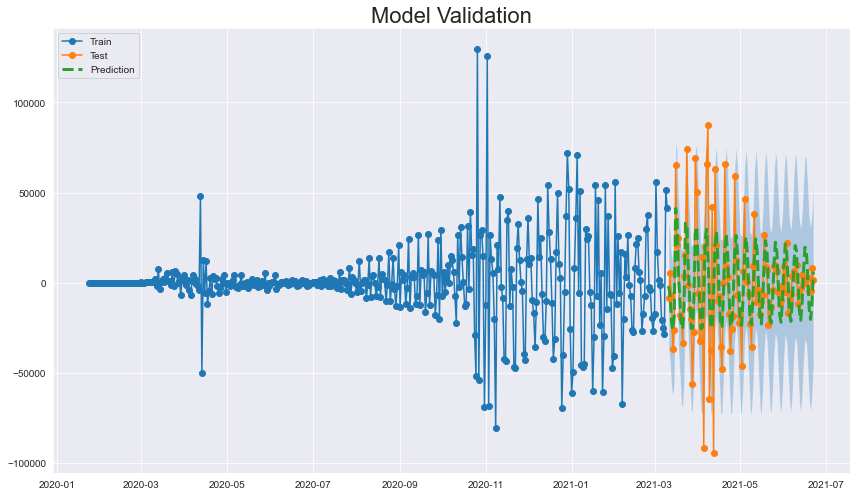

In [111]:
plot_train_test_pred(train_cases,test_cases,pred_df)

### Résiduels nombre de Cas après Modèle ARIMA 

In [112]:
residuals_ARIMA_cases = test_cases - pred_df['pred']

Text(0, 0.5, 'Error')

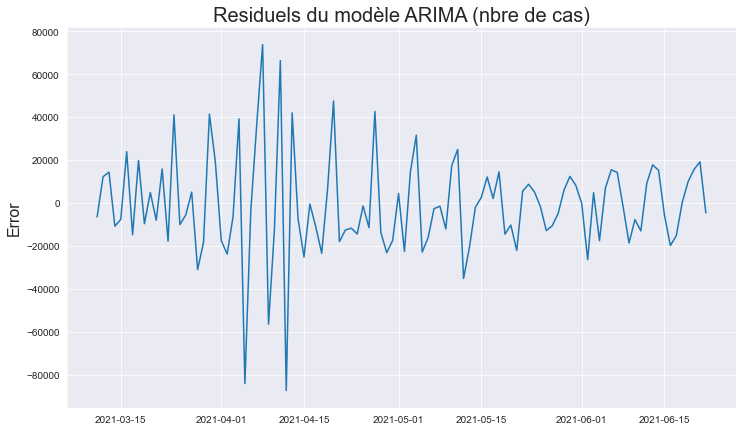

In [113]:
plt.figure(figsize=(12,7))
plt.plot(residuals_ARIMA_cases)
plt.title('Residuels du modèle ARIMA (nbre de cas)', fontsize=20)
plt.ylabel('Error', fontsize=16)


In [114]:
pred_deaths = forecast_to_df(results_deaths, steps = len(test_deaths))

In [115]:
pred = pred_deaths['pred']

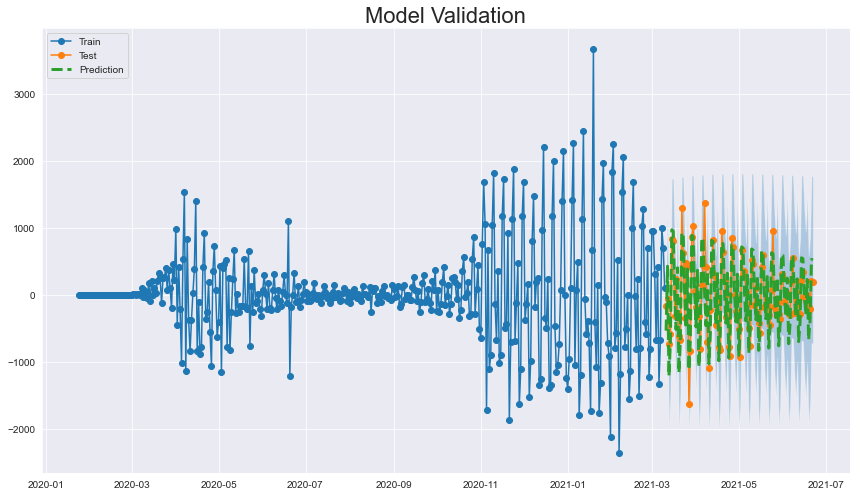

In [116]:
plot_train_test_pred(train_deaths,test_deaths,pred_deaths);

In [117]:
series_deaths = test_deaths - pred_deaths['pred']
mse_arma_deaths = series_deaths.apply(lambda x: x**2).mean()
rmse_arma_deaths = np.sqrt(mse_arma_deaths)

### Résiduels nombre de Morts après Modèle ARIMA 

In [118]:
residuals_ARIMA_deaths = test_deaths - pred_deaths['pred']

Text(0, 0.5, 'Error')

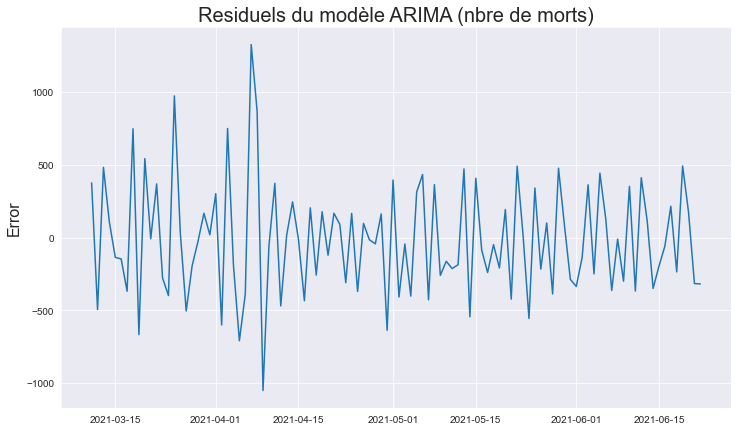

In [119]:
plt.figure(figsize=(12,7))
plt.plot(residuals_ARIMA_deaths)
plt.title('Residuels du modèle ARIMA (nbre de morts)', fontsize=20)
plt.ylabel('Error', fontsize=16)

In [120]:
#Creation du modèle
from datetime import timedelta
from statsmodels.tsa.arima_model import ARMA 
prediction_rolling =pd.Series()
for end_date in test_deaths.index:
    tr_deaths = deaths_diff[:end_date - timedelta(days=1)]
    model = ARMA(tr_deaths, order=(9,0))
    model_fit =model.fit()
    prediction = model_fit.predict(end_date)
    prediction_rolling.loc[end_date] = pred.loc[end_date]

In [121]:
residuals_rolling = test_deaths- prediction_rolling

In [122]:
prediction_rolling.head()

2021-03-11    -533.605740
2021-03-12     429.070314
2021-03-13   -1210.061259
2021-03-14    -693.942258
2021-03-15     973.383853
dtype: float64

Text(0, 0.5, 'Error')

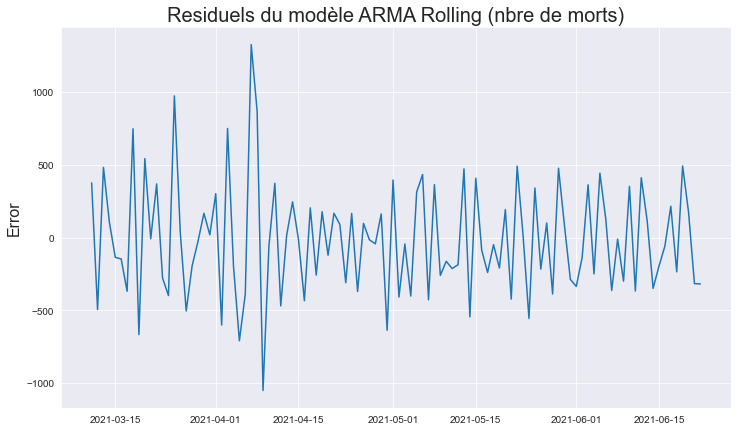

In [123]:
plt.figure(figsize=(12,7))
plt.plot(residuals_rolling)
plt.title('Residuels du modèle ARMA Rolling (nbre de morts)', fontsize=20)
plt.ylabel('Error', fontsize=16)

Text(0, 0.5, 'Nombre de morts')

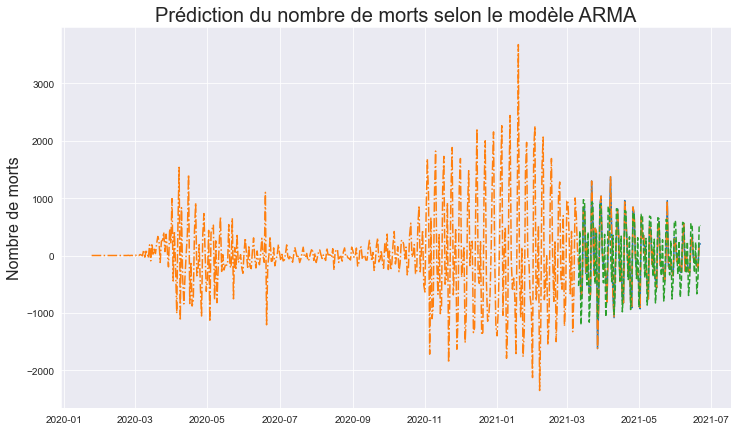

In [124]:
plt.figure(figsize=(12,7))
plt.plot(test_deaths)
plt.plot(tr_deaths, ls='-.')
plt.plot(prediction_rolling, ls ='--')
plt.title('Prédiction du nombre de morts selon le modèle ARMA', fontsize=20)
plt.ylabel('Nombre de morts', fontsize=16)

 - #### 7.3.f <span style="color:green"> RMSE ARMA vs RMSE RW</span>

In [125]:
print(f"RMSE Cases avec Random walk : {rmse_rw_cases}")
print("")
print(f"RMSE Cases avec Arma : {rmse_arma_cases}")
print("---------")
print(f"RMSE Deaths avec Random walk : {rmse_rw_deaths}")
print("")
print(f"RMSE Deaths avec Arma : {rmse_arma_deaths}")
print("")

RMSE Cases avec Random walk : 68134.9272540148

RMSE Cases avec Arma : 24008.608590262942
---------
RMSE Deaths avec Random walk : 2070.870947365397

RMSE Deaths avec Arma : 392.28242417037984



**On dénote une forte amélioration de la RMSE pour les deux séries avec un modèle de Random Walk et un modèle ARMA**

 - ### 7.4 <span style="color:blue"> XGBoost model</span>

**Credits:**  https://machinelearningmastery.com/xgboost-for-time-series-forecasting/

 - #### 7.4.a <span style="color:green"> Suppression des Outliers avec IQR</span>

In [126]:
Q1_cases = df_cases_x.quantile(0.25)
Q3_cases = df_cases_x.quantile(0.75)

# Then we define the interquantile range as the difference of the two.

IQR_cases = Q3_cases - Q1_cases
print(IQR_cases)

Albania                      432.0
Andorra                       41.0
Austria                     1886.0
Belarus                     1068.0
Belgium                     2441.0
Bosnia and Herzegovina       511.0
Bulgaria                     961.0
Croatia                      803.0
Czech republic              5155.0
Denmark                      734.0
Estonia                      383.0
Finland                      269.0
France                     19405.0
Germany                    10233.0
Gibraltar                      6.0
Greece                      1354.0
Holy See                       0.0
Hungary                     2046.0
Iceland                       14.0
Ireland                      487.0
Isle of Man                    1.0
Italy                      13462.0
Latvia                       507.0
Liechtenstein                  6.0
Lithuania                    824.0
Luxembourg                   170.0
Malta                        100.0
Moldova                      632.0
Monaco              

In [127]:
Q1_deaths = df_deaths_x.quantile(0.25)
Q3_deaths = df_deaths_x.quantile(0.75)

# Then we define the interquantile range as the difference of the two.

IQR_deaths = Q3_deaths - Q1_deaths
print(IQR_deaths)

Albania                      7.0
Andorra                      0.0
Austria                     28.0
Belarus                      5.0
Belgium                     50.0
Bosnia and Herzegovina      26.0
Bulgaria                    47.0
Croatia                     27.0
Czech republic             115.0
Denmark                      6.0
Estonia                      4.0
Finland                      2.0
France                     295.0
Germany                    244.0
Gibraltar                    0.0
Greece                      42.0
Holy See                     0.0
Hungary                    101.0
Iceland                      0.0
Ireland                     10.0
Isle of Man                  0.0
Italy                      401.0
Latvia                       8.0
Liechtenstein                0.0
Lithuania                   12.0
Luxembourg                   2.0
Malta                        1.0
Moldova                     14.0
Monaco                       0.0
Montenegro                   5.0
Netherland

In [128]:
cases_out =  df_cases_x[~((df_cases_x < (Q1_cases - 1.5 * IQR_cases)) |(df_cases_x > (Q3_cases + 1.5 * IQR_cases)))]

In [129]:
cases_out.shape #Toutes les données ont été conservées puisque entrant dans l'intervalle Q1/Q3

(517, 47)

In [130]:
deaths_out =  df_deaths_x[~((df_deaths_x < (Q1_deaths - 1.5 * IQR_deaths)) |(df_deaths_x > (Q3_deaths + 1.5 * IQR_deaths)))]

In [131]:
deaths_out.shape #Toutes les données ont été conservées puisque entrant dans l'intervalle Q1/Q3

(517, 47)

**En se basant sur les Case fatality rate, on utilisera les features précédèmment créées afin de grouper les pays en 3 groupes qui seront utilisées comme variables endogènes afin de prédire y: Total des Cas & y: Total des morts**

In [132]:
G1 = list(Groupe1.index)
G2 = list(Groupe2.index)
G3 = list(Groupe3.index)

In [133]:
X1_cases = df_cases_x[G1]
X2_cases = df_cases_x[G2]
X3_cases = df_cases_x[G3]

In [134]:
X1_cases["Total"] = X1_cases.sum(axis=1)
X2_cases["Total"] = X2_cases.sum(axis=1)
X3_cases["Total"] = X3_cases.sum(axis=1)

In [135]:
Y_cases =df_cases_x["Total"]

In [136]:
X1_deaths = df_deaths_x[G1]
X2_deaths = df_deaths_x[G2]
X3_deaths = df_deaths_x[G3]

In [137]:
X1_deaths["Total"] = X1_deaths.sum(axis=1)
X2_deaths["Total"] = X2_deaths.sum(axis=1)
X3_deaths["Total"] = X3_deaths.sum(axis=1)

In [138]:
Y_deaths =df_deaths_x["Total"]

 - #### 7.4.b <span style="color:green"> Stationnarisation</span>

In [139]:
X1_cases = X1_cases.diff().dropna()
X2_cases = X2_cases.diff().dropna()
X3_cases = X3_cases.diff().dropna()
Y_cases = Y_cases.diff().dropna()
X1_deaths = X1_deaths.diff().dropna()
X2_deaths = X2_deaths.diff().dropna()
X3_deaths = X3_deaths.diff().dropna()
Y_deaths = Y_deaths.diff().dropna()

In [140]:
cases = pd.concat([X1_cases["Total"], X2_cases["Total"],X3_cases["Total"],Y_cases], axis=1, keys = ["X1","X2","X3","Total"])

In [141]:
deaths = pd.concat([X1_deaths["Total"], X2_deaths["Total"],X3_deaths["Total"],Y_deaths], axis=1, keys = ["X1","X2","X3","Total"])

 - #### 7.4.c <span style="color:green"> Data transformation for Supervised learning dataset</span>

**La fonction series_to_supervised()**:

Cette fonction prend une série temporelle univariée ou multivariée et la présente comme un ensemble de données d'apprentissage supervisé.

elle prendra 4 arguments:

 - data: Série temporelle sous forme de liste ou de Numpy Array 2D.
 - n_in: Nombre d'observations lagguées (X). comprise entre [1..len(data)].
 - n_out: Nombre d'observations output (y). comprise entre [0..len(data)-1].
 - dropnan: suppression ou non des lignes avec NaN.
 
La fonction returnera un DataFrame pour un apprentissage supervisé.

In [142]:
# transform a time series dataset into a supervised learning dataset
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[0]
    df = pd.DataFrame(data)
    cols = list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
    # put it all together
    agg = pd.concat(cols, axis=1)
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg.values

 - #### 7.4.d <span style="color:green"> Data split</span>

In [143]:
# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
    return data[:-n_test, :], data[-n_test:, :]

 - #### 7.4.e <span style="color:green"> XGB Regressor fit & Predict</span>

In [144]:
# fit an xgboost model and make a one step prediction
def xgboost_forecast(train, testX):
    # transform list into array
    train = np.asarray(train)
    # split into input and output columns
    trainX, trainy = train[:, :-1], train[:, -1]
    # fit model
    model = XGBRegressor(objective='reg:squarederror', n_estimators=1000)
    model.fit(trainX, trainy)
    # make a one-step prediction
    yhat = model.predict(np.asarray([testX]))
    return yhat[0]

In [145]:
# walk-forward validation for univariate data
def walk_forward_validation(data, n_test):
    predictions = list()
    # split dataset
    train, test = train_test_split(data, n_test)
    # seed history with training dataset
    history = [x for x in train]
    # step over each time-step in the test set
    for i in range(len(test)):
        # split test row into input and output columns
        testX, testy = test[i, :-1], test[i, -1]
        # fit model on history and make a prediction
        yhat = xgboost_forecast(history, testX)
        # store forecast in list of predictions
        predictions.append(yhat)
        # add actual observation to history for the next loop
        history.append(test[i])
        # summarize progress
        #print('>expected=%.1f, predicted=%.1f' % (testy, yhat))
    # estimate prediction error
    rmse = np.sqrt((mean_absolute_error(test[:, -1], predictions))**2)
    return rmse, test[:, -1], predictions
 

RMSE: 4405.851


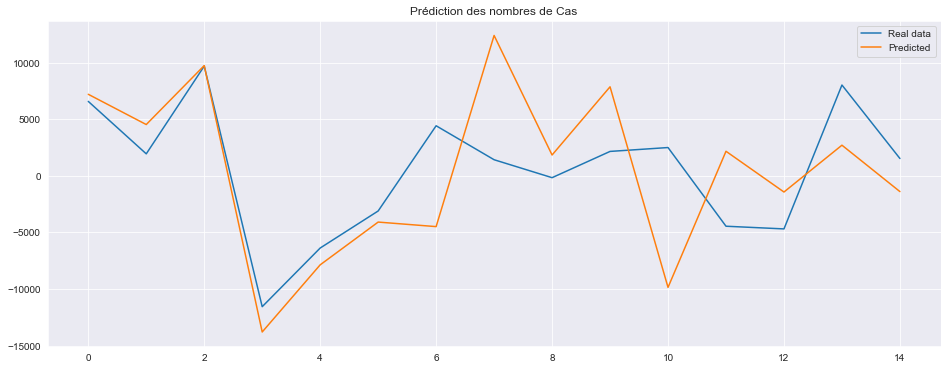

In [146]:
# transform the time series data into supervised learning
data_cases = series_to_supervised(cases["Total"], n_in=30) #Shift de 30 jours
# evaluate
rmsexgb_cases, y, yhat = walk_forward_validation(data_cases, 15) #Prédiction de 15 jours

print('RMSE: %.3f' % rmsexgb_cases)
# plot expected vs preducted
plt.plot(y, label='Real data')
plt.plot(yhat, label='Predicted')
plt.title("Prédiction des nombres de Cas")
plt.legend()
plt.show()

RMSE: 110.885


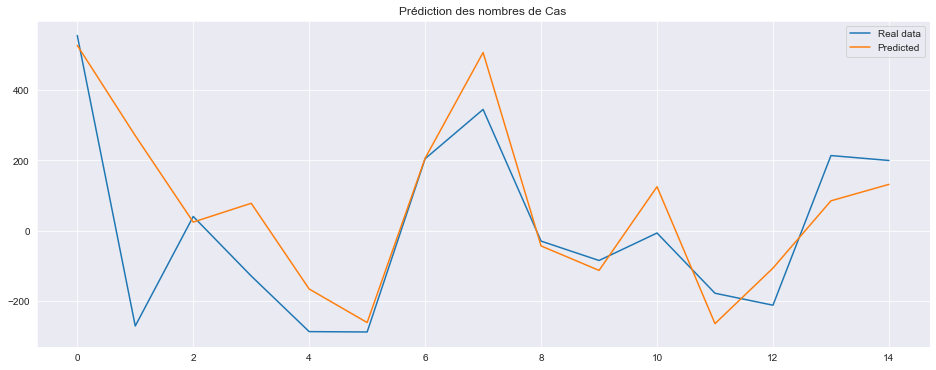

In [147]:
# transform the time series data into supervised learning
data_deaths = series_to_supervised(deaths["Total"], n_in=5) #Shift de 5 jours
# evaluate
rmsexgb_deaths, y, yhat = walk_forward_validation(data_deaths, 15) #Prédiction de 15 jours

print('RMSE: %.3f' % rmsexgb_deaths)
# plot expected vs preducted
plt.plot(y, label='Real data')
plt.plot(yhat, label='Predicted')
plt.title("Prédiction des nombres de Cas")
plt.legend()
plt.show()

In [148]:
print('Mean Absolute Percent Error:', round(np.mean(abs(residuals/test_data)),4))

NameError: name 'residuals' is not defined

In [ ]:
print('Root Mean Squared Error: ', np.sqrt(np.mean(residuals**2)))

 - #### 7.4.f <span style="color:green"> RandomWalk vs ARMA vs XGBOOST</span>

In [ ]:
print(f"RMSE Cases avec Random walk : {rmse_rw_cases}")
print("")
print(f"RMSE Cases avec Arma : {rmse_arma_cases}")
print("")
print(f"RMSE Cases avec XGBoost : {rmsexgb_cases}")
print("---------")
print(f"RMSE Deaths avec Random walk : {rmse_rw_deaths}")
print("")
print(f"RMSE Deaths avec Arma : {rmse_arma_deaths}")
print("")
print(f"RMSE Deaths avec XGBoost : {rmsexgb_deaths}")

RMSE Cases avec Random walk : 71781.36970974092

RMSE Cases avec Arma : 24008.608590262942

RMSE Cases avec XGBoost : 4405.85107421875
---------
RMSE Deaths avec Random walk : 1495.9262679475191

RMSE Deaths avec Arma : 392.28242417037984

RMSE Deaths avec XGBoost : 110.88481903076172


# 8.<span style="color:red"> Amélioration des modèles </span>

**Dans le cadre d'une potentielle amélioration pouvant être apportée, on a appliqué une approche expérimentale après analyse des données présentes**

**Vu que les premiers mois des datasets présentaient de faibles valeurs comparées à celles de du Q4 de 2020 et l'année 2021, on a tronqué la série jusqu'au 1er Août 2020**

 - ### 8.1 <span style="color:blue"> Préparation des séries</span>

In [ ]:
partie = 190
Cases = cases_diff.iloc[partie:]
Deaths =deaths_diff.iloc[partie:]

In [ ]:
train_size = 0.8
split_idx_C_EX = round(len(Cases)* train_size)
split_idx_C_EX

split_idx_D_EX = round(len(Deaths)* train_size)
split_idx_D_EX
# Split
train_C_EX = Cases.iloc[:split_idx_C_EX]
test_C_EX = Cases.iloc[split_idx_C_EX:]

train_D_EX = Deaths.iloc[:split_idx_D_EX]
test_D_EX = Deaths.iloc[split_idx_D_EX:]


 - ### 8.2 <span style="color:blue"> Seasonal decompose</span>

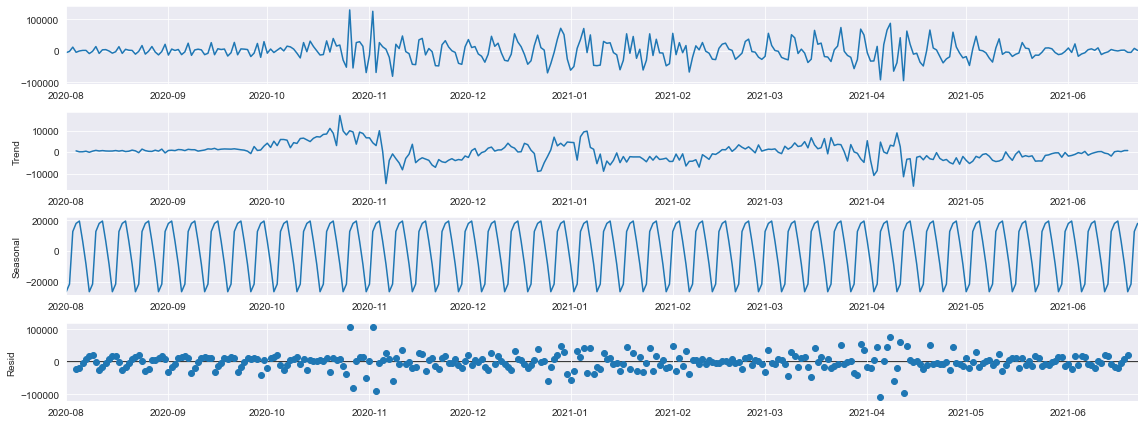

In [ ]:
result_C_EX = seasonal_decompose(Cases, model='additive')
result_C_EX.plot();

- **La saisonalité est detectée automatiquement (7jours)**
- **Les résiduels les plus importants correspondent aux pics épidémiologiques surtout Novembre 2020)**

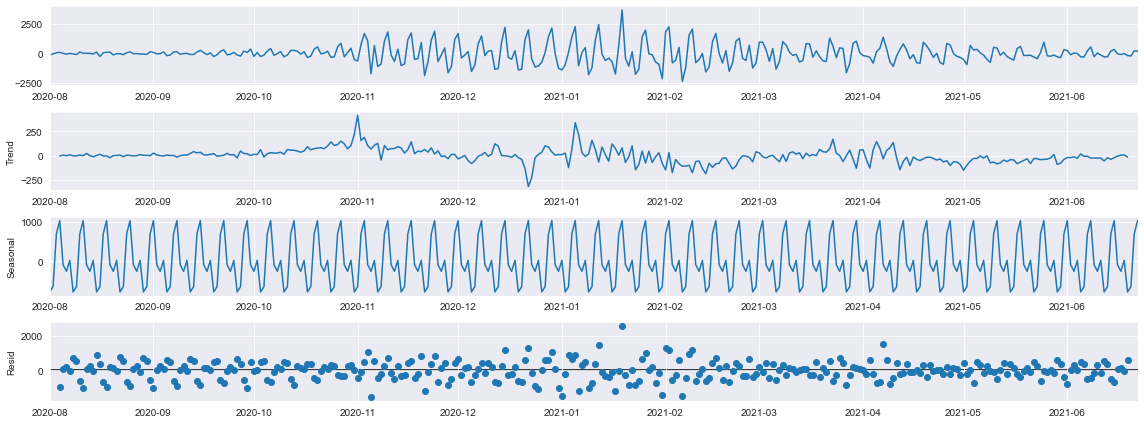

In [ ]:
result_D_EX = seasonal_decompose(Deaths, model='additive')
result_D_EX.plot();

- **La saisonalité est detectée automatiquement (7jours)**
- **Les résiduels les plus importants correspondent avec un légèr décallage aux pics épidémiologiques surtout Mi-Janvier 2021 avec les nouveaux variants du virus)**

 - ### 8.3 <span style="color:blue"> ACF & PACF</span>

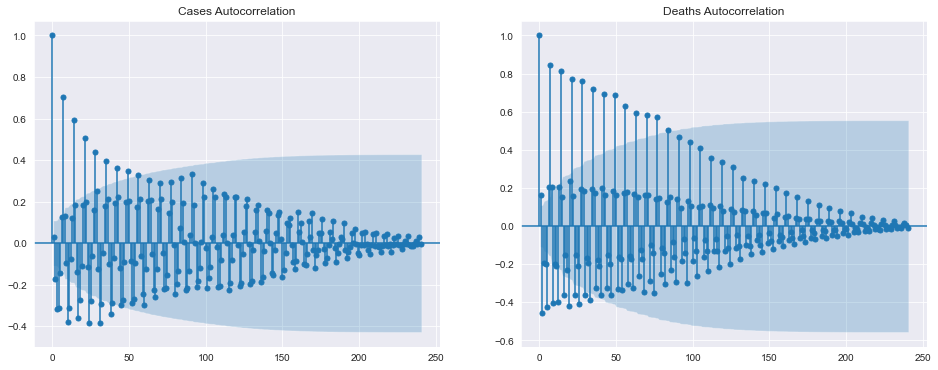

In [ ]:
fig, axes = plt.subplots(nrows=1 ,ncols=2)

plot_acf(Cases,ax=axes[0], title="Cases Autocorrelation", lags=240);
plot_acf(Deaths,ax=axes[1], title="Deaths Autocorrelation", lags=240);

Dans les deux séries:
 - **Les lags démontrent une tendance en vague décroissant qui alterne entre corrélations positive et négative**.
 - **Les lags positifs récurrents chaque 7 jours correspondent à la période de saisonnalité**.
 - **Terme autorégressif d'ordre supérieur dans les données**.

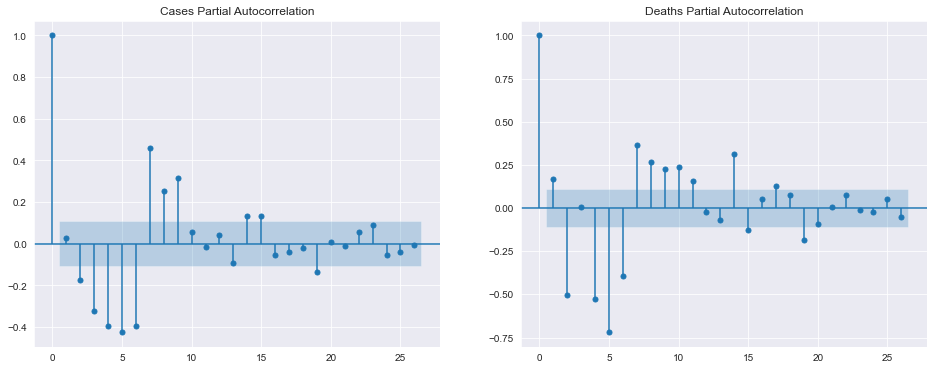

In [ ]:
fig, axes = plt.subplots(nrows=1 ,ncols=2)

plot_pacf(Cases,ax=axes[0], title="Cases Partial Autocorrelation");
plot_pacf(Deaths,ax=axes[1], title="Deaths Partial Autocorrelation");

 - **Pour les deux séries, on observe une baisse significative de l'importance des lags au bout de 9 jours pour les cas et 11 jours pour les morts**


 - ### 8.3 <span style="color:blue"> Random Walk</span>

 - #### 8.3.a <span style="color:green"> Préparation des séries et split Train/Test</span>

In [ ]:
#Conversion d'un DF vers un pandas Series
Cases = Cases.squeeze()
Deaths = Deaths.squeeze()

In [ ]:
train_C_EX, test_C_EX= np.split(Cases, [int(.80 *len(Cases))])
train_D_EX, test_D_EX= np.split(Deaths, [int(.80 *len(Deaths))])

 - #### 8.3.b <span style="color:green"> Application du RW et visualisation des prédictions</span>

In [ ]:
result_C_EX = simulate_rw(train_C_EX, test_C_EX)
result_D_EX = simulate_rw(train_D_EX, test_D_EX)

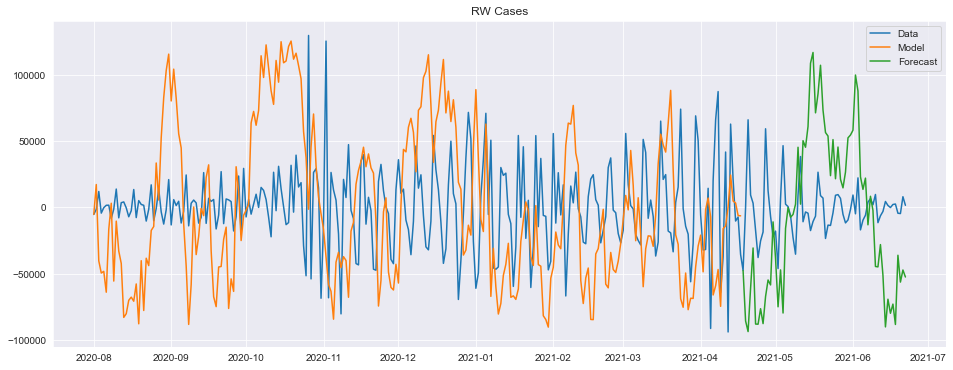

In [ ]:
plt.plot(result_C_EX)
plt.legend(('Data', 'Model', 'Forecast'))
plt.title('RW Cases')
plt.show()

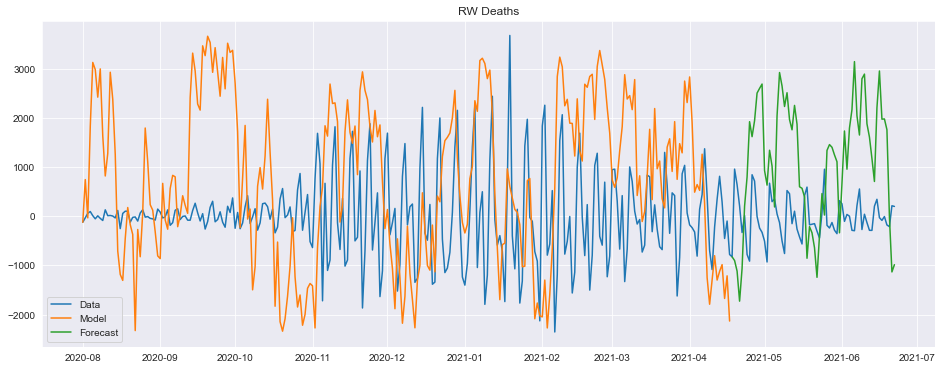

In [ ]:
plt.plot(result_D_EX)
plt.legend(('Data', 'Model', 'Forecast'))
plt.title('RW Deaths')
plt.show()

 - #### 8.3.c <span style="color:green"> RMSE</span>

In [ ]:
## residuals
result_C_EX["residuals"] = result_C_EX["data"] - result_C_EX["model"]
result_C_EX["error"] = result_C_EX["data"] - result_C_EX["forecast"]
result_C_EX["error_pct"] = result_C_EX["error"] / result_C_EX["data"]
        
## kpi
residuals_mean_C_EX = result_C_EX["residuals"].mean()
residuals_std_C_EX = result_C_EX["residuals"].std()
error_mean_C_EX = result_C_EX["error"].mean()
error_std_C_EX = result_C_EX["error"].std()
mse_C_EX = result_C_EX["error"].apply(lambda x: np.abs(x)).mean()
mape_C_EX = result_C_EX["error_pct"].apply(lambda x: np.abs(x)).mean()  
mse_rw_C_EX = result_C_EX["error"].apply(lambda x: x**2).mean()
rmse_rw_C_EX = np.sqrt(mse_rw_C_EX)  #root mean squared error

In [ ]:
## residuals
result_D_EX["residuals"] = result_D_EX["data"] - result_D_EX["model"]
result_D_EX["error"] = result_D_EX["data"] - result_D_EX["forecast"]
result_D_EX["error_pct"] = result_D_EX["error"] / result_D_EX["data"]
        
## kpi
residuals_mean_D_EX = result_D_EX["residuals"].mean()
residuals_std_D_EX = result_D_EX["residuals"].std()
error_mean_D_EX = result_D_EX["error"].mean()
error_std_D_EX = result_D_EX["error"].std()
mse_D_EX = result_D_EX["error"].apply(lambda x: np.abs(x)).mean()
mape_D_EX = result_D_EX["error_pct"].apply(lambda x: np.abs(x)).mean()  
mse_rw_D_EX = result_D_EX["error"].apply(lambda x: x**2).mean()
rmse_rw_D_EX = np.sqrt(mse_rw_D_EX)  #root mean squared error

In [ ]:
print(f"RMSE Cases (série complète) avec Random walk : {rmse_rw_cases}")
print("")
print(f"RMSE Cases (expérimentale) avec Random walk : {rmse_rw_C_EX}")
print("---------")
print(f"RMSE Deaths avec Random walk : {rmse_rw_deaths}")
print("")
print(f"RMSE Deaths (expérimentale) avec Random walk : {rmse_rw_D_EX}")

RMSE Cases (série complète) avec Random walk : 71781.36970974092

RMSE Cases (expérimentale) avec Random walk : 63529.54460443919
---------
RMSE Deaths avec Random walk : 1495.9262679475191

RMSE Deaths (expérimentale) avec Random walk : 1775.0704626528368


 - ### 8.4 <span style="color:blue"> AutoReg model</span>

 - #### 8.4.a <span style="color:green"> Choix des lags & Entrainement du modèle</span>

In [ ]:
mod_C_EX = ar_select_order(Cases, maxlag=15)
mod_C_EX.ar_lags

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
mod_D_EX = ar_select_order(Deaths, maxlag=15)
mod_D_EX.ar_lags

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [ ]:
mod_C_EX = AutoReg(Cases, lags =[1, 2, 3, 4, 5, 6, 7, 8, 9],seasonal=True)
res_C_EX = mod_C_EX.fit()
print(res_C_EX.summary())

                            AutoReg Model Results                             
Dep. Variable:                  Total   No. Observations:                  326
Model:               Seas. AutoReg(9)   Log Likelihood               -3561.906
Method:               Conditional MLE   S.D. of innovations          18349.507
Date:                Sat, 24 Jul 2021   AIC                             19.742
Time:                        13:01:55   BIC                             19.944
Sample:                    08-10-2020   HQIC                            19.822
                         - 06-22-2021                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -5843.0504   3425.339     -1.706      0.088   -1.26e+04     870.490
seasonal.1 -3533.0582   4319.533     -0.818      0.413    -1.2e+04    4933.071
seasonal.2  6354.8501   5039.522      1.261      0.2

**Il n y a pas une différence notoire entre l'AIC de la série complète et l'AIC de la série tronquée**.

In [ ]:
mod_D_EX = AutoReg(Deaths, lags =[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], seasonal=True)
res_D_EX = mod_D_EX.fit()
print(res_D_EX.summary())

                            AutoReg Model Results                             
Dep. Variable:                  Total   No. Observations:                  326
Model:              Seas. AutoReg(14)   Log Likelihood               -2262.190
Method:               Conditional MLE   S.D. of innovations            340.928
Date:                Sat, 24 Jul 2021   AIC                             11.804
Time:                        13:01:55   BIC                             12.068
Sample:                    08-15-2020   HQIC                            11.910
                         - 06-22-2021                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   -111.7549     72.624     -1.539      0.124    -254.095      30.585
seasonal.1   -52.0977     96.761     -0.538      0.590    -241.746     137.550
seasonal.2   118.8433    115.691      1.027      0.3

 - #### 8.4.b <span style="color:green"> AR prediction</span>

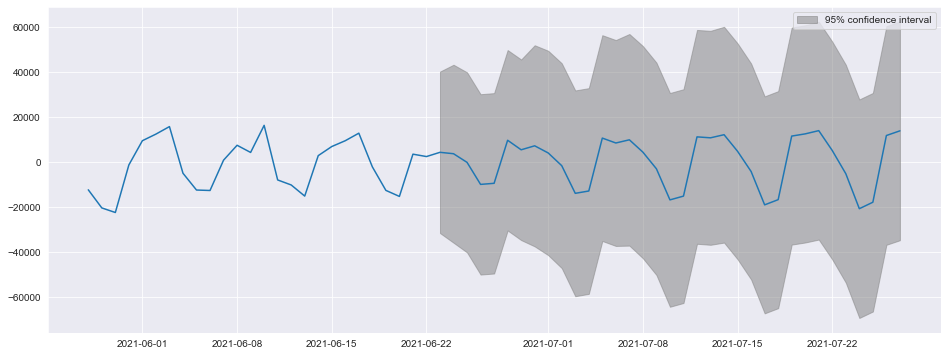

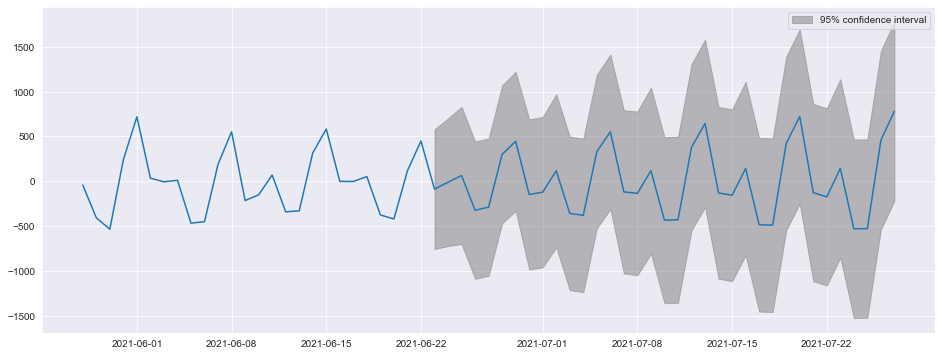

In [ ]:
fig = res_C_EX.plot_predict(300,360)
fig = res_D_EX.plot_predict(300,360)

 - #### 8.4.c <span style="color:green"> Model diagnostics</span>

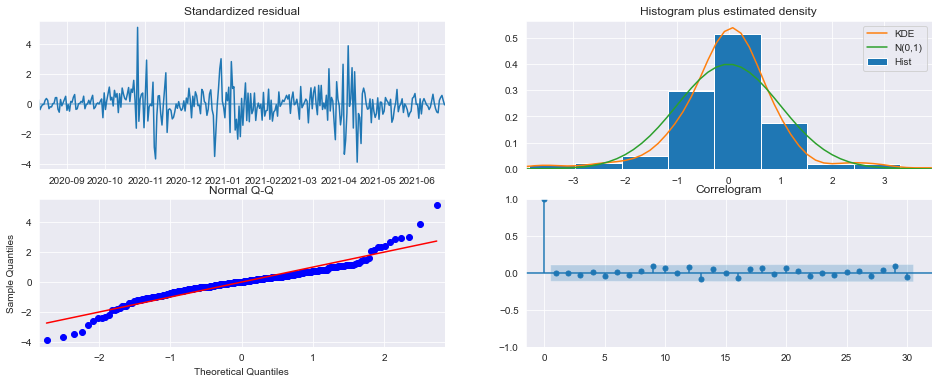

In [ ]:
fig = res_C_EX.plot_diagnostics(lags=30)

**La distribution des quantiles est légèrement améliorée par rapport à la série complète et les queues de distribution surtout des nombres de Cas est beaucoup moins épaisse** 

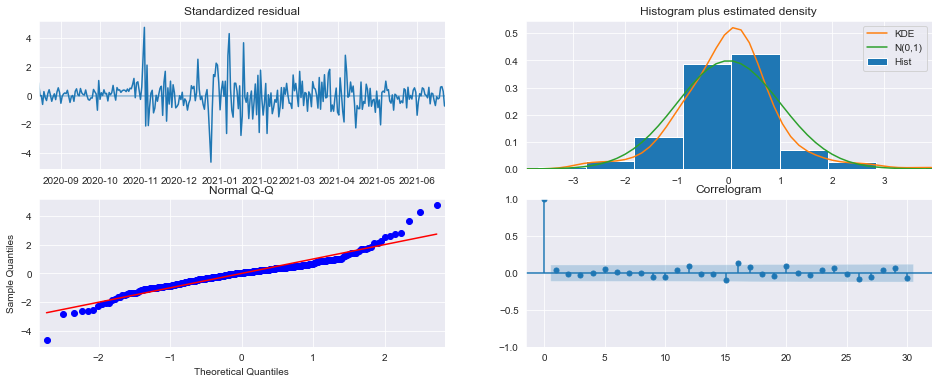

In [ ]:
fig = res_D_EX.plot_diagnostics(lags=30)

 - ### 8.5 <span style="color:blue"> ARMA model</span>

 - #### 8.5.a <span style="color:green"> AutoArima</span>

In [ ]:
auto_cases_EX = auto_arima(Cases)
auto_cases_EX.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  326
Model:               SARIMAX(5, 0, 4)   Log Likelihood               -3695.583
Date:                Sat, 24 Jul 2021   AIC                           7411.167
Time:                        13:02:16   BIC                           7449.036
Sample:                             0   HQIC                          7426.279
                                - 326                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3676      0.134      2.735      0.006       0.104       0.631
ar.L2         -0.9719      0.114     -8.505      0.000      -1.196      -0.748
ar.L3          0.0040      0.145      0.028      0.978      -0.280       0.288
ar.L4         -0.4817      0.067     -7.145      0.000      -0.614      -0.350
ar.L5         -0.4470      0.078     -5.697      0.000      -0.601      -0.293
ma.L1         -0.8649      0.148     -5.829      0.000      -1.156      -0.574
ma.L2          1.0985      0.168      6.527      0.000       0.769       1.428
ma.L3         -0.5141      0.157     -3.272      0.001      -0.822      -0.206
ma.L4          0.4656      0.091      5.102      0.000       0.287       0.644
sigma2      5.297e+08    3.3e-10   1.61e+18      0.000     5.3e+08     5.3e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):               369.80
Prob(Q):                              0.72   Prob(JB):                         0.00
Heteroskedasticity (H):               0.92   Skew:                             0.71
Prob(H) (two-sided):                  0.65   Kurtosis:                         8.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.1e+33. Standard errors may be unstable.
"""

**L'AutoArima sur la série nombre de Cas préconise un modèle SARMAX (5,0,4) comme sur la série complète**

In [ ]:
auto_deaths_EX = auto_arima(Deaths)
auto_deaths_EX.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  326
Model:               SARIMAX(5, 0, 4)   Log Likelihood               -2389.221
Date:                Sat, 24 Jul 2021   AIC                           4798.442
Time:                        13:02:33   BIC                           4836.311
Sample:                             0   HQIC                          4813.554
                                - 326                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4487      0.086      5.243      0.000       0.281       0.616
ar.L2         -1.1299      0.065    -17.481      0.000      -1.257      -1.003
ar.L3          0.2891      0.114      2.527      0.011       0.065       0.513
ar.L4         -0.6933      0.061    -11.380      0.000      -0.813      -0.574
ar.L5         -0.3298      0.075     -4.375      0.000      -0.478      -0.182
ma.L1         -0.7546      0.091     -8.300      0.000      -0.933      -0.576
ma.L2          0.9066      0.089     10.240      0.000       0.733       1.080
ma.L3         -0.5574      0.091     -6.107      0.000      -0.736      -0.378
ma.L4          0.4877      0.061      8.036      0.000       0.369       0.607
sigma2      1.562e+05   9264.492     16.865      0.000    1.38e+05    1.74e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):               307.13
Prob(Q):                              0.69   Prob(JB):                         0.00
Heteroskedasticity (H):               0.98   Skew:                             0.79
Prob(H) (two-sided):                  0.93   Kurtosis:                         7.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**L'AutoArima sur la série nombre de Morts préconise un modèle SARMAX (5,0,4) contrairement à la série complète qui était un modèle SARMAX (2,0,2) et avec une saisonnalité de 7 jours visible dans les plots ACF**

 - #### 8.5.b <span style="color:green"> SARIMAX Fitting</span>

In [ ]:
model_C_EX = sm.tsa.statespace.SARIMAX(train_C_EX, order = (5,0,4), seasonal_order=(1,0,1,7))
model_D_EX = sm.tsa.statespace.SARIMAX(train_D_EX, order = (5,0,4), seasonal_order=(1,0,1,7))

In [ ]:
results_C_EX = model_C_EX.fit()
results_C_EX.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               Total   No. Observations:                  260
Model:             SARIMAX(5, 0, 4)x(1, 0, [1], 7)   Log Likelihood               -2955.522
Date:                             Sat, 24 Jul 2021   AIC                           5935.045
Time:                                     13:02:35   BIC                           5977.773
Sample:                                 08-01-2020   HQIC                          5952.222
                                      - 04-17-2021                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3590      0.686      0.523      0.601      -0.986       1.704
ar.L2          0.0380      0.902      0.042      0.966      -1.730       1.806
ar.L3         -0.8993      0.805     -1.117      0.264      -2.478       0.679
ar.L4          0.0689      0.293      0.235      0.814      -0.505       0.643
ar.L5         -0.1154      0.152     -0.758      0.448      -0.414       0.183
ma.L1         -0.8321      0.675     -1.234      0.217      -2.154       0.490
ma.L2         -0.0320      1.218     -0.026      0.979      -2.418       2.354
ma.L3          0.9786      1.155      0.847      0.397      -1.285       3.242
ma.L4         -0.4764      0.499     -0.955      0.340      -1.454       0.501
ar.S.L7        0.6252      0.154      4.052      0.000       0.323       0.928
ma.S.L7       -0.1235      0.194     -0.635      0.525      -0.504       0.257
sigma2        6.4e+08   6.58e-09   9.73e+16      0.000     6.4e+08     6.4e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               199.19
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               2.25   Skew:                             0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.45e+33. Standard errors may be unstable.
"""

- **Les lags n'ont pas de significativité statistique avec des p_value>5%**
- **La saisonnalité 7jours du module AR est la seule qui a une significativté statistique et impacte positivement les valeurs**
- **L'AIC 5935.044 est amélioré comparé à l'AIC: 9086.248 de la série complète**

In [ ]:
results_D_EX = model_D_EX.fit()
results_D_EX.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               Total   No. Observations:                  260
Model:             SARIMAX(5, 0, 4)x(1, 0, [1], 7)   Log Likelihood               -1920.771
Date:                             Sat, 24 Jul 2021   AIC                           3865.541
Time:                                     13:02:37   BIC                           3908.269
Sample:                                 08-01-2020   HQIC                          3882.719
                                      - 04-17-2021                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6763      0.507      1.334      0.182      -0.318       1.670
ar.L2         -0.9298      0.562     -1.654      0.098      -2.031       0.172
ar.L3          0.4573      0.579      0.790      0.430      -0.677       1.592
ar.L4         -0.5059      0.258     -1.961      0.050      -1.012      -0.000
ar.L5         -0.0598      0.209     -0.286      0.775      -0.470       0.351
ma.L1         -1.0279      0.506     -2.033      0.042      -2.019      -0.037
ma.L2          0.7095      0.720      0.986      0.324      -0.701       2.120
ma.L3         -0.4746      0.560     -0.847      0.397      -1.573       0.623
ma.L4          0.3181      0.210      1.517      0.129      -0.093       0.729
ar.S.L7        0.9496      0.028     33.575      0.000       0.894       1.005
ma.S.L7       -0.6607      0.094     -7.019      0.000      -0.845      -0.476
sigma2      1.796e+05   1.41e+04     12.770      0.000    1.52e+05    2.07e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):               126.46
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):              13.68   Skew:                             0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

- **Le lag n°4 a une significativité statistique avec une p_value<5% avec une influence négative**
- **Le MA n°1 a une significativité statistique avec une p_value<5% avec une forte influence négative**
- **La saisonnalité 7jours du module AR a une significativté statistique et un impact positif important sur les valeurs**
- **La saisonnalité 7jours du module MA a une significativté statistique et un impact négatif sur les valeurs**
- **L'AIC 3865.662 est amélioré comparé à l'AIC: 6102.373 de la série complète**

 - #### 8.5.c <span style="color:green"> SARIMAX Forecast</span>

In [ ]:
pred_df_C_EX = forecast_to_df(results_C_EX, steps = len(test_C_EX))
pred_df_D_EX = forecast_to_df(results_D_EX, steps = len(test_D_EX))

In [ ]:
pred_C_EX = pred_df_C_EX['pred']
pred_D_EX = pred_df_D_EX['pred']

(<Figure size 864x504 with 1 Axes>,
 <AxesSubplot:title={'center':'Model Validation'}>)

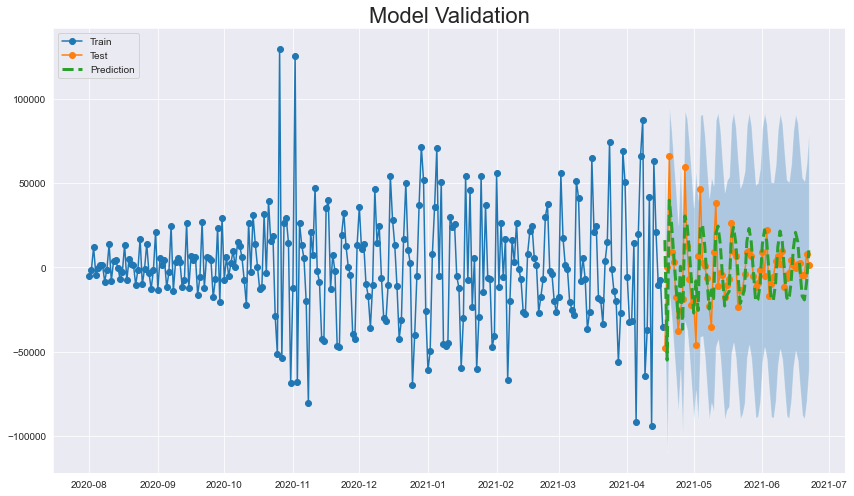

In [ ]:
plot_train_test_pred(train_C_EX,test_C_EX,pred_df_C_EX)

(<Figure size 864x504 with 1 Axes>,
 <AxesSubplot:title={'center':'Model Validation'}>)

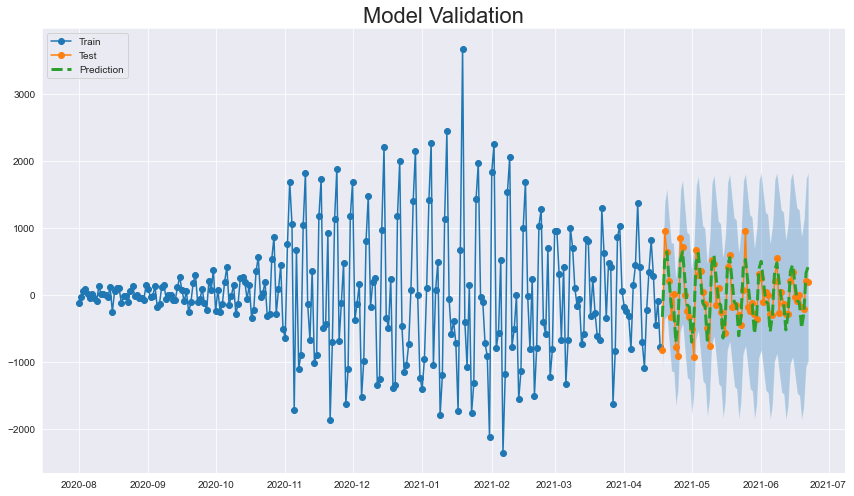

In [ ]:
plot_train_test_pred(train_D_EX,test_D_EX,pred_df_D_EX)

 - #### 8.5.d <span style="color:green"> RMSE</span>

In [ ]:
mse_C_EX = mean_squared_error(pred_C_EX, test_C_EX)
rmse_C_EX = np.sqrt(mse_C_EX)
mse_D_EX = mean_squared_error(pred_D_EX, test_D_EX)
rmse_D_EX = np.sqrt(mse_D_EX)

 - ### 8.6 <span style="color:blue"> Bilan des RMSE (série complète & série expérimentale)</span>

In [ ]:
bilan=pd.DataFrame({'Modèles':['Random Walk (Série complète)', 'Random Walk (Série expérimentale)', 'ARMA (Série complète)', 'ARMA (Série expérimentale)','XGBoost'],
                    "Cases":[rmse_rw_cases,rmse_rw_C_EX,rmse_arma_cases,rmse_C_EX,rmsexgb_cases],
                    "Deaths":[rmse_rw_deaths,rmse_rw_D_EX,rmse_arma_deaths,rmse_D_EX,rmsexgb_deaths]})
bilan.set_index("Modèles", inplace=True)

In [ ]:
bilan

Cases       Deaths
Modèles                                                     
Random Walk (Série complète)       71781.369710  1495.926268
Random Walk (Série expérimentale)  63529.544604  1775.070463
ARMA (Série complète)              24008.608590   392.282424
ARMA (Série expérimentale)         18731.078252   237.568102
XGBoost                             4405.851074   110.884819